In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar warnings
warnings.filterwarnings("ignore")

### EDA (Exploratory Descriptive Analysis)
Analizaremos los datasets descriptivamente. Primero los importaremos:

In [103]:
df_hechos = pd.read_csv("hechos.csv", sep = ";")
df_victimas = pd.read_csv("victimas.csv", sep = ";")
df_merged = pd.read_csv("Merged.csv", sep = ";")

Empezaremos con el Dataset "Hechos"

Vamos a analizar la columna de N_Victimas. Veremos media, mediana y outliers. 
Empezaremos identificando la media y la mediana

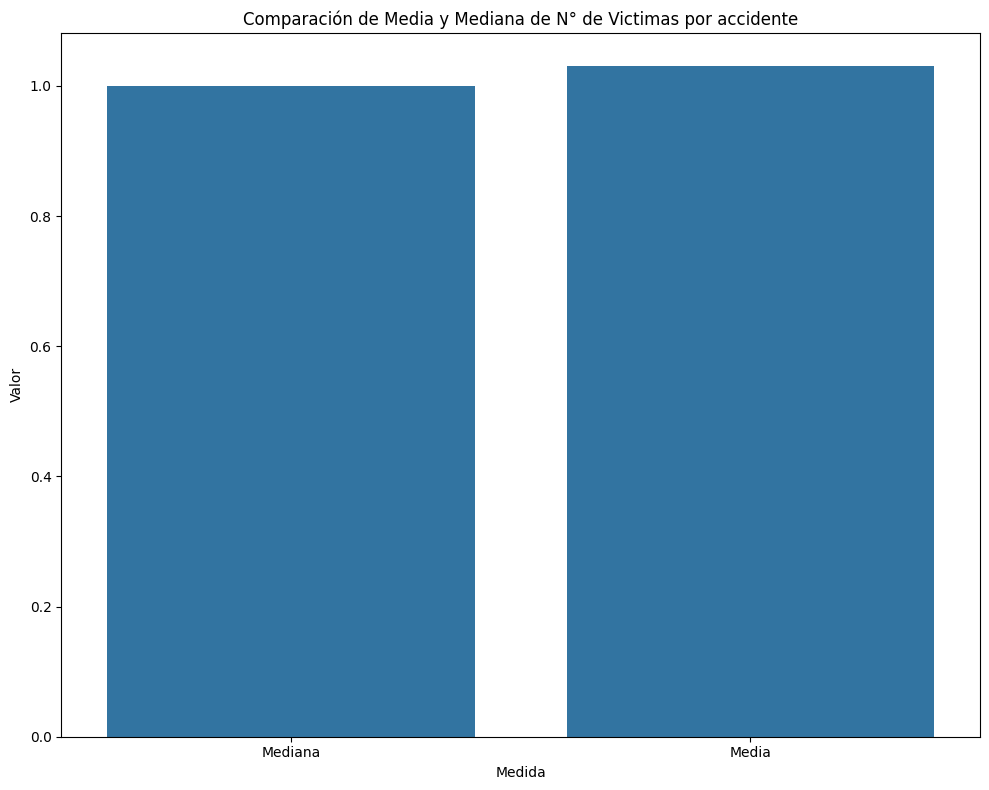

In [3]:
victimas_median = df_hechos["N_Victimas"].median()
victimas_avg = df_hechos["N_Victimas"].mean()

# Debo crear un dataframe para graficar desde ahí
data = {
    "Medida": ["Mediana", "Media"],
    "Valor" : [victimas_median, victimas_avg]
        }
data_plot = pd.DataFrame(data)
plt.figure(figsize=(10,8))
sns.barplot(x = "Medida", y = "Valor", data = data_plot)
plt.xlabel("Medida")
plt.ylabel("Valor")
plt.title("Comparación de Media y Mediana de N° de Victimas por accidente")
plt.tight_layout()
plt.show()

Podemos ver que no hay mayor diferencia entre la mediana y la media. Lo cual puede inferir que no hay gran cantidad de outliers. Para ver los outliers vamos a ver la distribucion por los valores unicos.

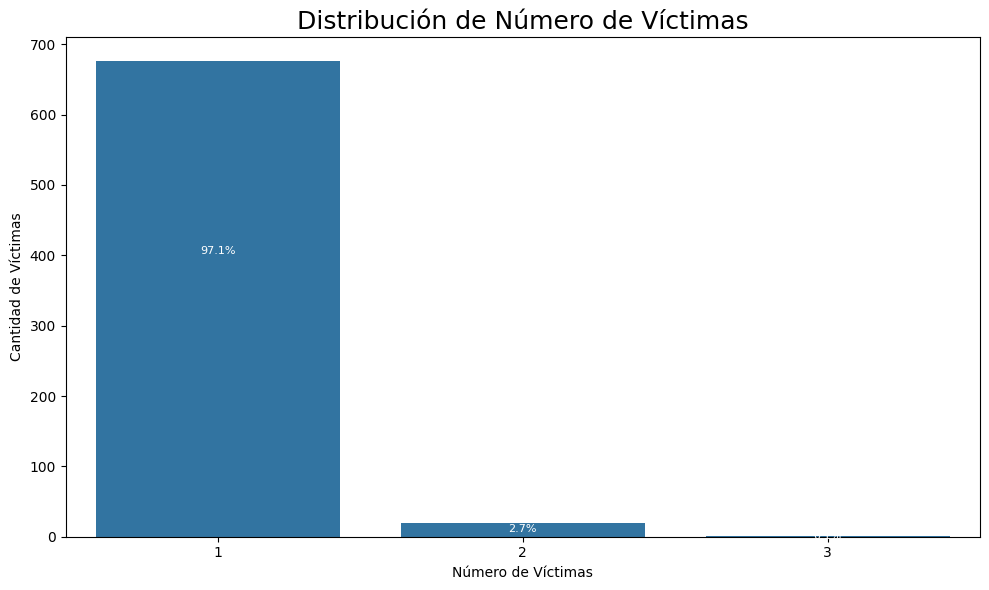

In [4]:
proporcion_victimas = df_hechos["N_Victimas"].value_counts()
porcentaje_victimas = (proporcion_victimas / proporcion_victimas.sum()) * 100

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x = proporcion_victimas.index, y = proporcion_victimas.values)
for index, value in enumerate(proporcion_victimas.values):
    porcentaje = porcentaje_victimas.iloc[index]  
    barplot.text(index, value - (value * 0.4), f'{porcentaje:.1f}%', color='white', ha="center", va="center", fontsize = 8)


plt.title("Distribución de Número de Víctimas", fontsize = 18)
plt.xlabel("Número de Víctimas")  # Usar la función plt.xlabel()
plt.ylabel("Cantidad de Víctimas")  # Usar la función plt.ylabel()

plt.tight_layout()
plt.show()

Podemos ver que gran parte de los datos se concentran en un valor. Esto nos lleva a inferir que la cantidad de outliers es escasa. 

Vamos a comprobarlo con un diagrama de cajas.

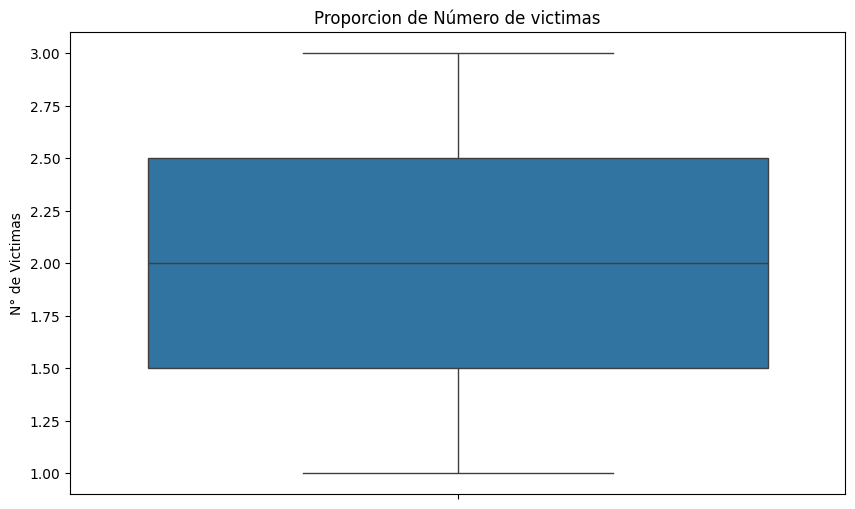

In [5]:
#
proporcion_victimas = df_hechos["N_Victimas"].value_counts()
plt.figure(figsize=(10,6))
sns.boxplot(y = proporcion_victimas.index)
plt.title("Proporcion de Número de victimas")
plt.ylabel("N° de Victimas")
plt.show()

Hemos analizado las variables de Numero de victimas (1, 2 o 3 victimas). Ahora nos enfocaremos en la cantidad. Procederemos a ver la cantidad total de de siniestros, promedio y mediana.

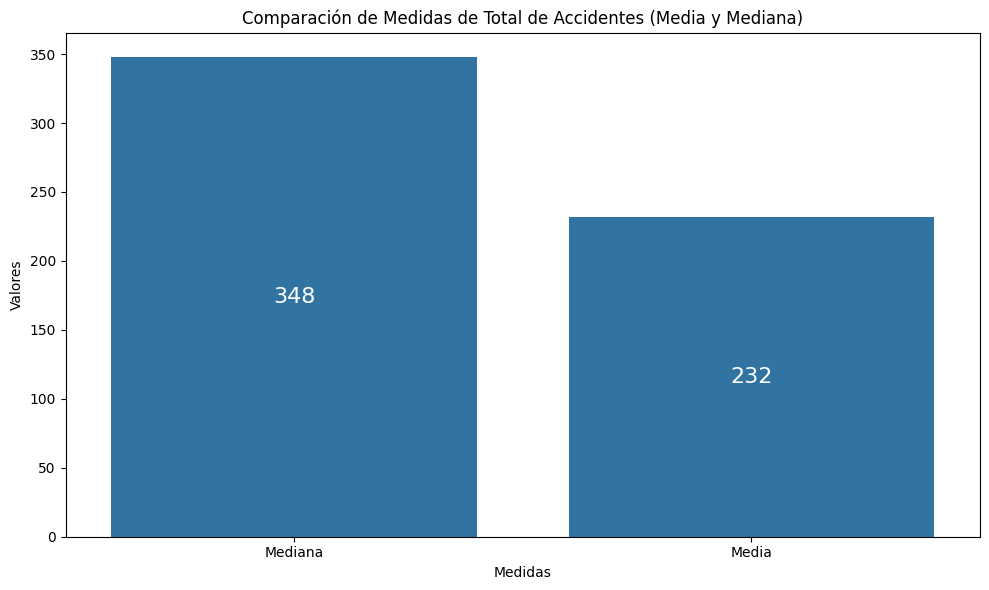

In [6]:
# Se realiza ahora en el contexto de numero de accidentes
mediana_total = np.sum(proporcion_victimas.values)/ 2
media_total = np.mean(proporcion_victimas.values)
data_total = {
    "Medidas" : ["Mediana", "Media"],
    "Valores" : [mediana_total, media_total]
}
data_total = pd.DataFrame(data_total)
# Gráfica
plt.figure(figsize=(10,6))
barplot = sns.barplot(x = "Medidas", y = "Valores", data = data_total)
for index, value in enumerate(data_total["Valores"]):
    barplot.text(index, value - (value * 0.5), f'{int(value)}', color='white', ha="center", va="center", fontsize = 16)

plt.xlabel("Medidas")
plt.ylabel("Valores")
plt.title("Comparación de Medidas de Total de Accidentes (Media y Mediana)")
plt.tight_layout()
plt.show()

Podemos observar que la media y la mediana tienen una gran diferencia. En primer lugar, cuando esto sucede esto se puede inferir que existen valores atipicos que afectan la media. En cuanto a la mediana, se puede afirmar que el 50% de los datos están por debajo de 348. Esto sugiere que, aunque hay algunos valores más bajos, muchos de los datos se concentran en valores más altos.

In [7]:
df_hechos.head(5)

,Id,N_Victimas,Fecha,Año,Mes,Día,Nombre_Día,Hora,Franja Horaria Entera,Lugar_Del_Hecho,...,Cruce,Dirección Normalizada,Comuna,Pos X,Pos Y,Coordenada_X,Coordenada_Y,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,Enero,1,Viernes,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,98896.782384,93532.434378,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,Enero,2,Sábado,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,95832.055711,95505.416420,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,Enero,3,Domingo,07:00:00,7.0,AV ENTRE RIOS 2034,...,NaN,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,106684.290900,99706.576878,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,Enero,10,Domingo,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,99840.652248,94269.165344,MOTO-SD,MOTO,NaN
4,2016-0005,1,2016-01-21,2016,Enero,21,Jueves,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,106980.328279,100752.169158,MOTO-PASAJEROS,MOTO,PASAJEROS


Ahora exploraremos la columna de Año. Veremos el comportamiento de los siniestros año a año, Podemos observar en la grafica que desde el año 2018 se experimentó una caida que se ha convertido en tendencia. Sin embargo, del año 2020 al 2021 se vio un ligero aumento en la cantidad de siniestros.

NOTA: Debemos prestar atencion al año 2020 para ver si es posible encontrar el factor desencadenante de este sutil incremento de siniestros. Lo mismo para el año 2017.
Por otro lado, al analizar el año 2018 es posible que se logre encontrar un elemento determinante en la disminución de siniestros.

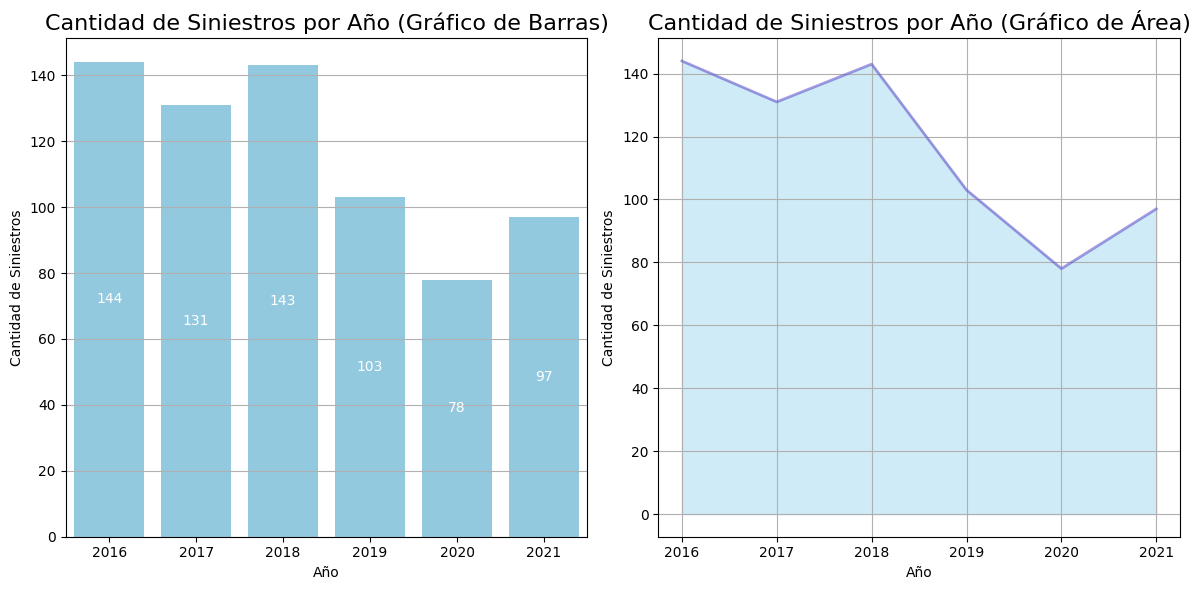

In [8]:
conteos = df_hechos["Año"].value_counts().sort_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico de barras
barplot = sns.barplot(x = conteos.index, y = conteos.values, ax = axs[0], color='skyblue')
axs[0].set_title("Cantidad de Siniestros por Año (Gráfico de Barras)", fontsize=16)
axs[0].set_xlabel("Año")
axs[0].set_ylabel("Cantidad de Siniestros")
axs[0].grid(axis = 'y')  

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2),  
                     ha='center', va='center', fontsize=10, color='white',  
                     xytext=(0, 0),  
                     textcoords='offset points')

# Gráfico de área
axs[1].fill_between(conteos.index, conteos.values, color='skyblue', alpha=0.4)
axs[1].plot(conteos.index, conteos.values, color='Slateblue', alpha=0.6, linewidth=2)
axs[1].set_title("Cantidad de Siniestros por Año (Gráfico de Área)", fontsize=16)
axs[1].set_xlabel("Año")
axs[1].set_ylabel("Cantidad de Siniestros")
axs[1].grid()

plt.tight_layout()
plt.show()

Ahora nos centraremos en los meses para ver el numero de siniestros en esta unidad de tiempo.

<Figure size 1800x200 with 0 Axes>

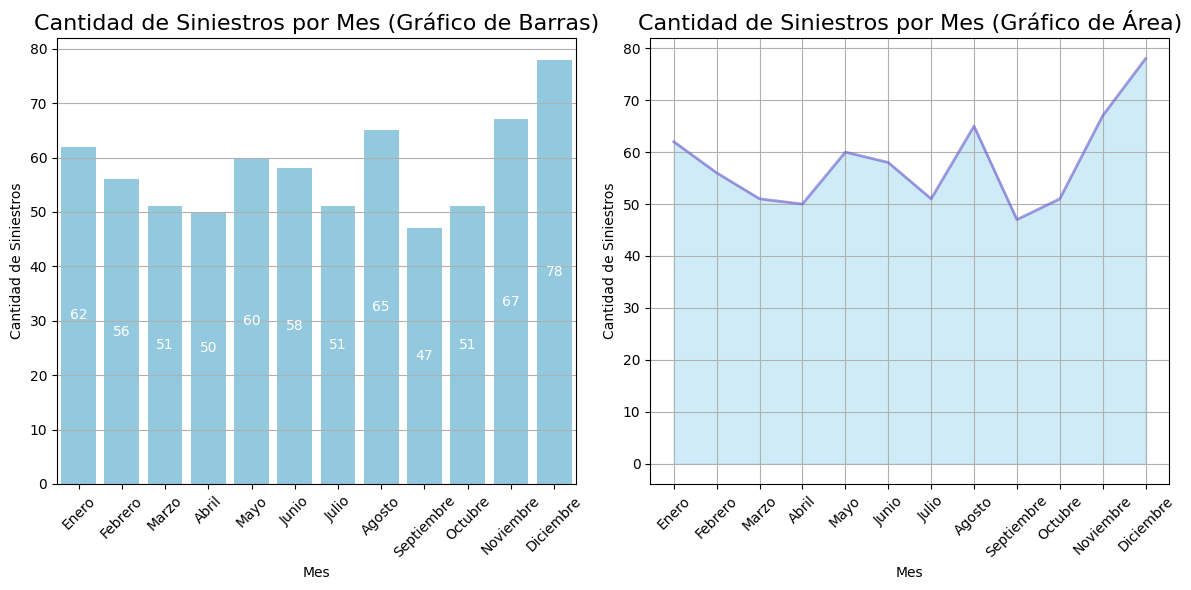

In [9]:
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_hechos['Mes'] = pd.Categorical(df_hechos['Mes'], categories =orden_meses, ordered=True)

# Agrupar por mes y contar la cantidad de siniestros por mes
df_agrupado = df_hechos.groupby('Mes', observed=False).size().reset_index(name='Cantidad')


# Crear la figura y los subplots
plt.figure(figsize=(18, 2))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico de barras
barplot = sns.barplot(x=df_agrupado['Mes'], y=df_agrupado['Cantidad'], ax=axs[0], color='skyblue')
axs[0].set_title("Cantidad de Siniestros por Mes (Gráfico de Barras)", fontsize=16)
axs[0].set_xlabel("Mes")
axs[0].set_ylabel("Cantidad de Siniestros")
axs[0].grid(axis='y')
axs[0].set_xticks(range(len(df_agrupado)))  
axs[0].set_xticklabels(df_agrupado['Mes'], rotation=45)

# Anotaciones en las barras
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2),  
                     ha='center', va='center', fontsize=10, color='white',  
                     xytext=(0, 0),  
                     textcoords='offset points')

# Gráfico de área
axs[1].fill_between(df_agrupado['Mes'], df_agrupado['Cantidad'], color='skyblue', alpha=0.4)
axs[1].plot(df_agrupado['Mes'], df_agrupado['Cantidad'], color='Slateblue', alpha=0.6, linewidth=2)
axs[1].set_title("Cantidad de Siniestros por Mes (Gráfico de Área)", fontsize=16)
axs[1].set_xlabel("Mes")
axs[1].set_ylabel("Cantidad de Siniestros")
axs[1].grid()
axs[1].set_xticks(range(len(df_agrupado['Mes']))) 
axs[1].set_xticklabels(df_agrupado['Mes'], rotation=45)

plt.tight_layout()
plt.show()

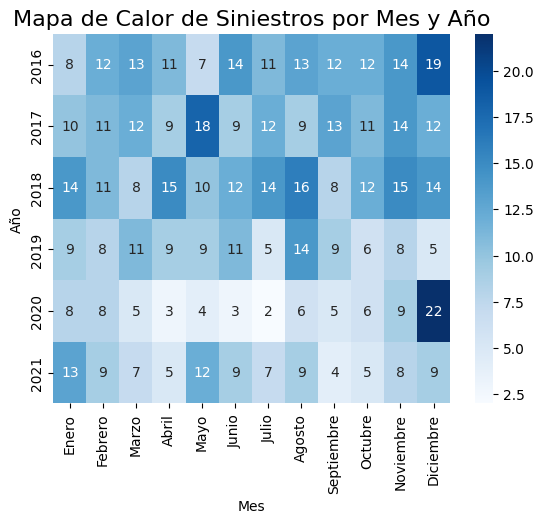

In [10]:
heatmap_data = pd.pivot_table(df_hechos, values='N_Victimas', index='Año', columns='Mes', aggfunc='sum', observed=False)
sns.heatmap(heatmap_data, cmap='Blues', annot=True)
plt.title("Mapa de Calor de Siniestros por Mes y Año", fontsize = 16)
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()



### Interpretación:
Este gráfico permite observar patrones temporales en los siniestros. Algunos posibles hallazgos podrían ser:

- Diciembre de 2020 es un punto atípico con el valor más alto (22 siniestros), que destaca en el gráfico.
- Años con mayor número de siniestros distribuidos: En 2018, hay varios meses con valores más altos (como mayo con 15 siniestros), lo que podría indicar que en ese año hubo más actividad en cuanto a siniestros, comparado con otros años.
- Variaciones estacionales: Algunos meses como diciembre (tanto en 2016, 2018 y 2020) parecen tener consistentemente más siniestros en comparación con meses como febrero o marzo, que suelen tener valores más bajos.

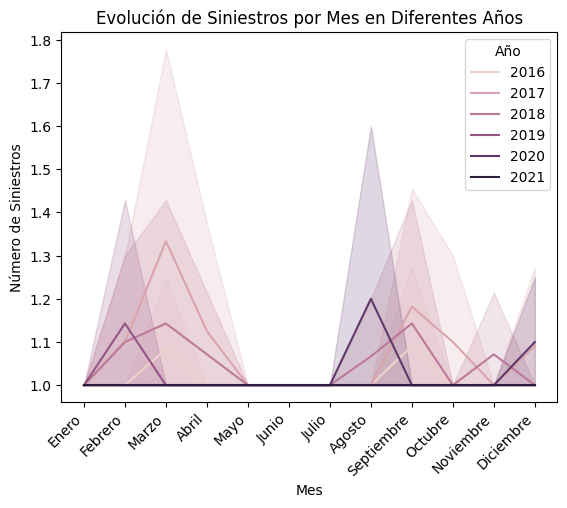

In [11]:
sns.lineplot(data=df_hechos, x='Mes', y='N_Victimas', hue='Año')
plt.title("Evolución de Siniestros por Mes en Diferentes Años")
plt.xlabel("Mes")
plt.ylabel("Número de Siniestros")

plt.xticks(rotation=45, ha='right')  

plt.show()


Se puede observar que el mes con mas accidentes ha sido Diciembre. Puede que este relacionado con las festividades, el comienzo del verano y el posible consumo de alcohol. De igual manera, cabe mencionar que tambien hay otros meses que se destacan por su alta concentracion de siniestros. Estos son Agosto y Noviembre.

Despues de investigar de los fenomenos sociales ocurridos en la ciudad de Buenos Aires durante estos meses, se pueden añadir estas conclusiones o explicaciones.

### Diciembre y Noviembre: Las Fiestas y el Clima
- Fiestas de fin de año: Al igual que en el resto del país, las celebraciones navideñas y de Año Nuevo generan un aumento significativo en la circulación, especialmente en zonas comerciales y de esparcimiento.
- Reuniones sociales: Las fiestas familiares y con amigos suelen implicar desplazamientos en distintos horarios, lo que puede coincidir con horas pico y generar mayor congestión.
- Consumo de alcohol: Las celebraciones festivas van de la mano con el consumo de bebidas alcohólicas, lo que aumenta el riesgo de accidentes por disminución de reflejos y capacidad de reacción.
- Condiciones climáticas: En Buenos Aires, noviembre y diciembre suelen ser meses de transición climática, con días cálidos y noches frescas. Estos cambios bruscos pueden afectar la visibilidad y el estado de las calles.

### Agosto: El Verano Porteño y los Fines de Semana Largos
- Vacaciones de invierno: Si bien en el hemisferio sur el invierno es en junio y julio, muchos argentinos aprovechan agosto para tomar mini-vacaciones o realizar escapadas de fin de semana.
- Fines de semana largos: La cantidad de feriados en agosto aumenta el flujo vehicular hacia las afueras de la ciudad y a las playas cercanas.
- Clima cálido: Las altas temperaturas y la humedad pueden generar fatiga en los conductores, especialmente en viajes largos.
- Mayor cantidad de jóvenes al volante: Durante las vacaciones, muchos jóvenes toman el auto para salir con amigos, lo que puede aumentar el riesgo de accidentes debido a la falta de experiencia.

Se anexan algunas recomendaciones:

### Medidas para prevenir accidentes
- Refuerzo de controles: Aumentar la presencia de agentes de tránsito en zonas estratégicas, especialmente durante las fechas festivas.
- Campañas de concientización: Promover la importancia de conducir con precaución, respetar las normas de tránsito y no conducir bajo los efectos del alcohol.
- Mantenimiento de las calles: Invertir en el mantenimiento de las calles y la señalización vial.
- Fomento del transporte público: Mejorar la frecuencia y calidad del transporte público para desalentar el uso del automóvil particular.

In [12]:
df_hechos.head(2)

,Id,N_Victimas,Fecha,Año,Mes,Día,Nombre_Día,Hora,Franja Horaria Entera,Lugar_Del_Hecho,...,Cruce,Dirección Normalizada,Comuna,Pos X,Pos Y,Coordenada_X,Coordenada_Y,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,Enero,1,Viernes,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,98896.782384,93532.434378,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,Enero,2,Sábado,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,95832.055711,95505.416420,AUTO-PASAJEROS,AUTO,PASAJEROS


Ahora evaluaremos la columna días. Para ver si hay alguna conexion entre un dia y el número de accidentes.

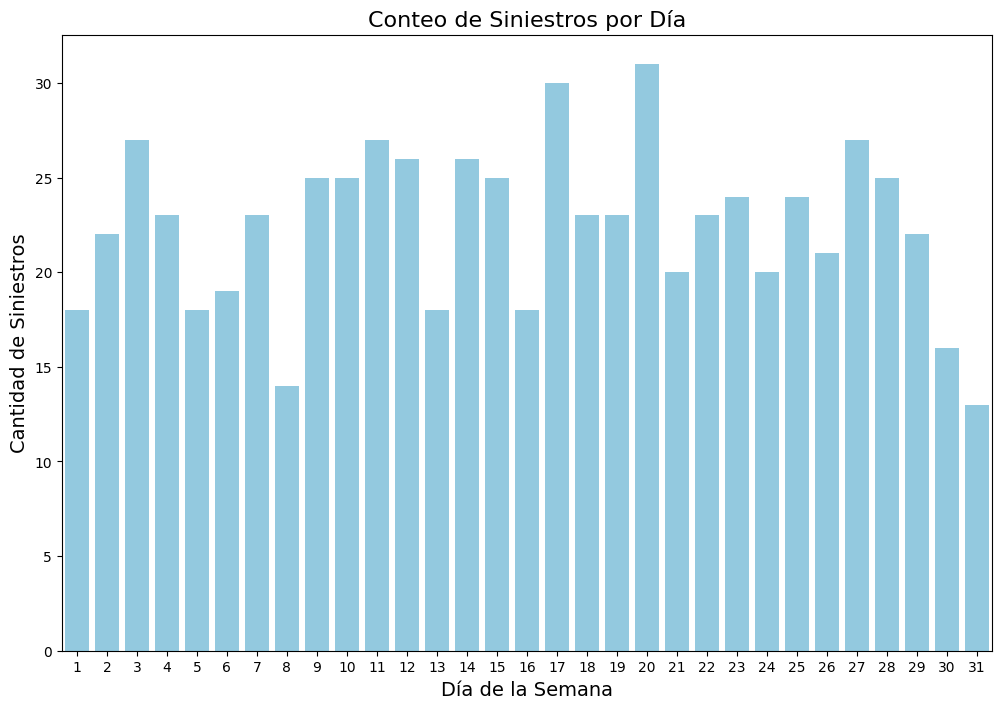

In [13]:
conteo_dias = df_hechos["Día"].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=conteo_dias.index, y=conteo_dias.values, color='skyblue')

plt.title("Conteo de Siniestros por Día", fontsize=16)
plt.xlabel("Día de la Semana", fontsize=14)
plt.ylabel("Cantidad de Siniestros", fontsize=14)


plt.show()



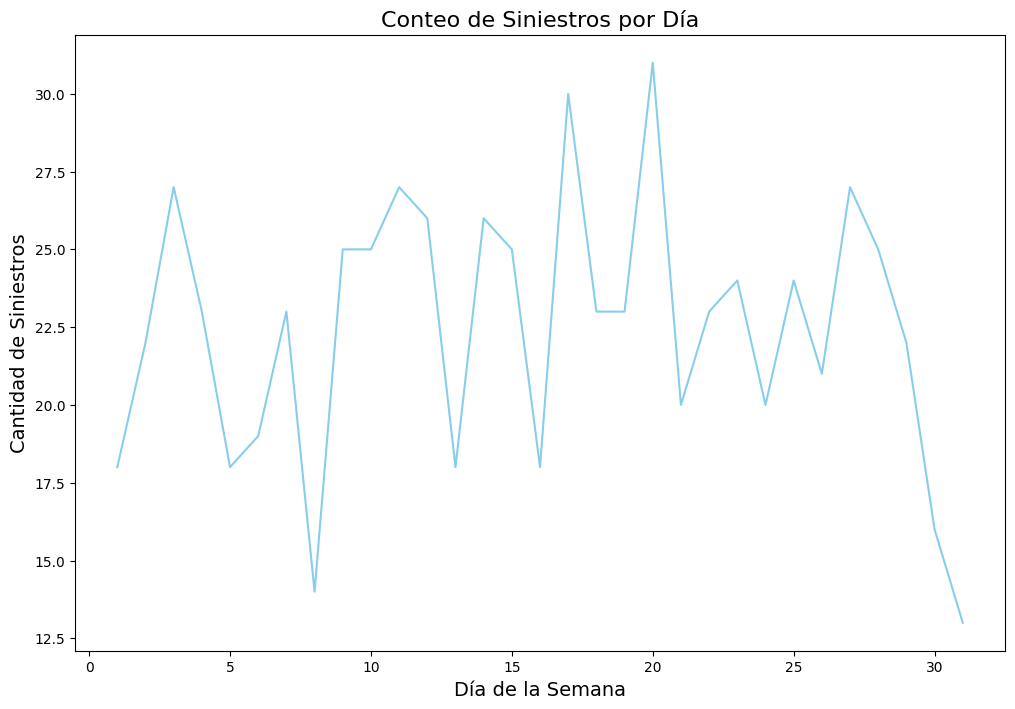

In [14]:
conteo_dias = df_hechos["Día"].value_counts()

plt.figure(figsize=(12, 8))
sns.lineplot(x=conteo_dias.index, y=conteo_dias.values, color='skyblue')

plt.title("Conteo de Siniestros por Día", fontsize=16)
plt.xlabel("Día de la Semana", fontsize=14)
plt.ylabel("Cantidad de Siniestros", fontsize=14)

plt.show()

In [15]:
origin = conteo_dias.sort_values(ascending=False)
top_5 = origin.head(5) 
top_5_df = pd.DataFrame(top_5).reset_index()  # Resetea el índice
top_5_df.columns = ['Día', 'N_Victimas']  
total = origin.sum()  
top_5_df["Porcentaje"] = (top_5_df["N_Victimas"] / total) * 100  # Se calcula el porcentaje

top_5_df["Porcentaje"] = top_5_df["Porcentaje"].round(2)

top_5_df


,Día,N_Victimas,Porcentaje
0,20,31,4.45
1,17,30,4.31
2,3,27,3.88
3,11,27,3.88
4,27,27,3.88


Podemos observar que los días con mayores accidentes son los dias [20, 17, 3, 11, 27]. Sin embargo, se puede afirmar que no son datos validos o material para conclusiones. Ya que su incidencia es muy poca, menos de 4%


Ahora vamos a enfocarnos en la columna de nombre dias. El objetivo es ver si existe algun patron que incida en la cantidad de siniestros.


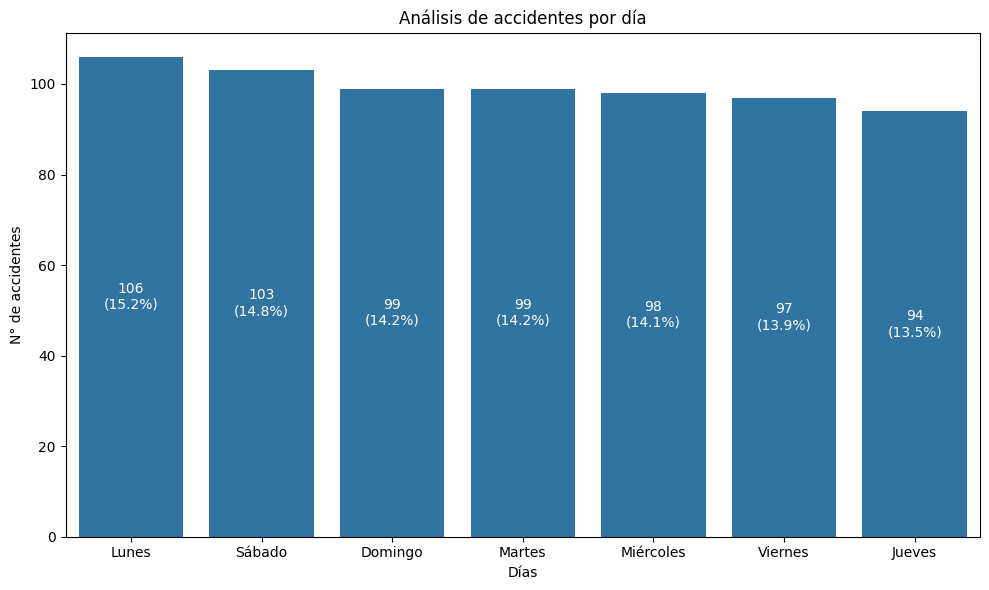

In [24]:
conteo_dias_n = df_hechos["Nombre_Día"].value_counts()

total = conteo_dias_n.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_dias_n.index, y = conteo_dias_n.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')

# Configuraciones adicionales del gráfico
plt.xlabel("Días")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por día")
plt.tight_layout()
plt.show()



Se puede afirmar que no existe ninguna incidencia de los dias en la cantidad de siniestros, ya que la diferencia de valores es muy minima (1%). Por lo tanto, no existe relacion entre días y cantidad de siniestros.

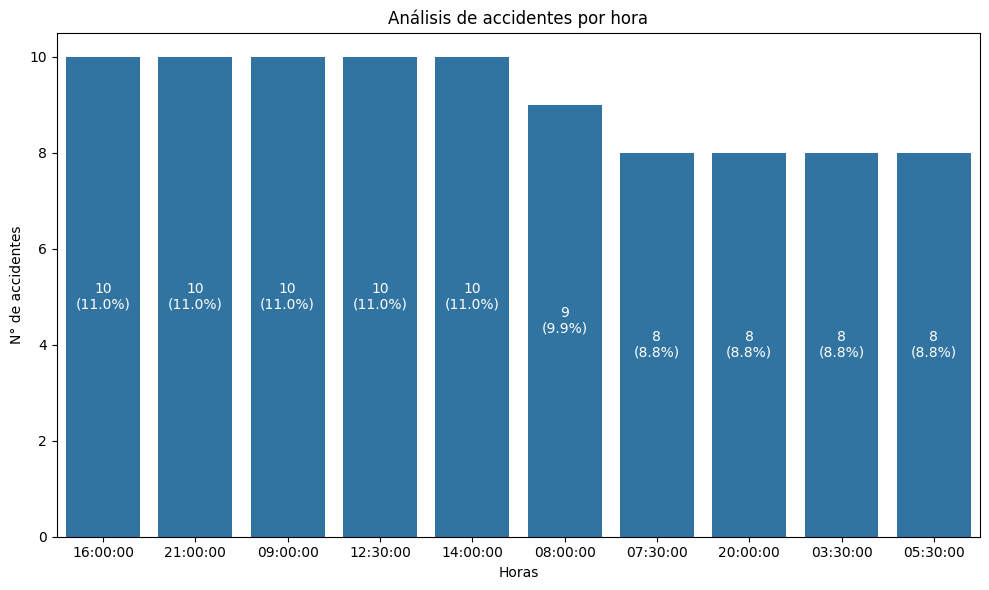

In [32]:
# por horas
top_10_conteo_horas = df_hechos["Hora"].value_counts().head(10)

total = top_10_conteo_horas.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = top_10_conteo_horas.index, y = top_10_conteo_horas.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')

plt.xlabel("Horas")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por hora")
plt.tight_layout()
plt.show()

### Observaciones Generales:

- Distribución relativamente uniforme: Los accidentes se distribuyen de manera bastante uniforme a lo largo de las horas registradas, sin picos extremadamente altos o bajos.
- Mayor concentración en las primeras horas: Existe una ligera tendencia a que ocurran más accidentes en las primeras horas registradas (16:00, 21:00, 09:00, 12:30 y 14:00).

### Conclusiones:

- No hay un horario crítico: A simple vista, no se identifica un horario específico en el que se concentre la mayor parte de los accidentes. Esto sugiere que las condiciones de riesgo podrían ser relativamente constantes a lo largo del período analizado.
- Posibles factores a considerar en las primeras horas:
    -Inicio de la jornada: Los accidentes en las primeras horas podrían relacionarse con el inicio de las actividades, cuando los trabajadores aún no están completamente concentrados o cuando las condiciones de trabajo aún no están totalmente estables.
- Cambios de turno: Si los datos corresponden a diferentes turnos, los cambios de turno podrían ser un factor de riesgo, ya que los trabajadores pueden estar más cansados o menos atentos en esos momentos.
- Condiciones ambientales: Las condiciones ambientales (luz, temperatura, etc.) al inicio o final de la jornada podrían influir en la ocurrencia de accidentes.

Ahora veremos la columna de 'Lugar_Del_Hecho'. EL objetivo es ver si existen calles en las cuales sea mas probable que ocurra un accidente.

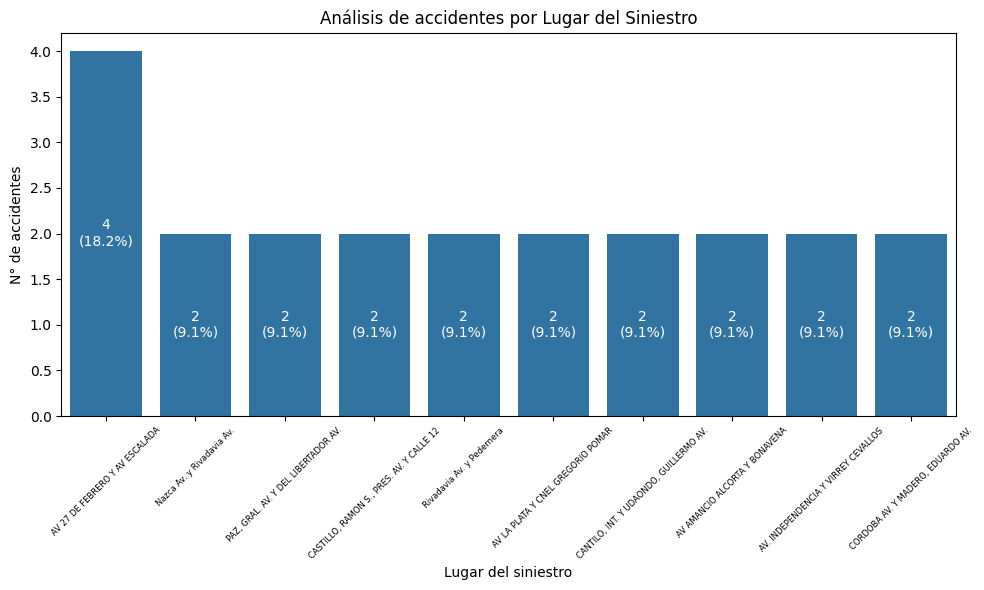

In [53]:
conteo_lugar = df_hechos['Lugar_Del_Hecho'].value_counts().head(10)
total = conteo_lugar.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_lugar.index, y = conteo_lugar.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')
plt.xticks(rotation=45, fontsize=6)
plt.xlabel("Lugar del siniestro")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Lugar del Siniestro")
plt.tight_layout()
plt.show()

Podemos ver que la calle "Av 27 de Febrero y Av Escalada" es la calle con mas accidentes. Representa el 18,2% de la totalidad de los siniestros. Aunque es un porcentaje sutilmente robusto, se puede concluir que es una calle en la cual, debido a sus caracteristicas arquitectonicas y/o algun otro factor, se hace propenso a accidentes.

Haremos el mismo ejercicios con la columna "Tipo de Calle"

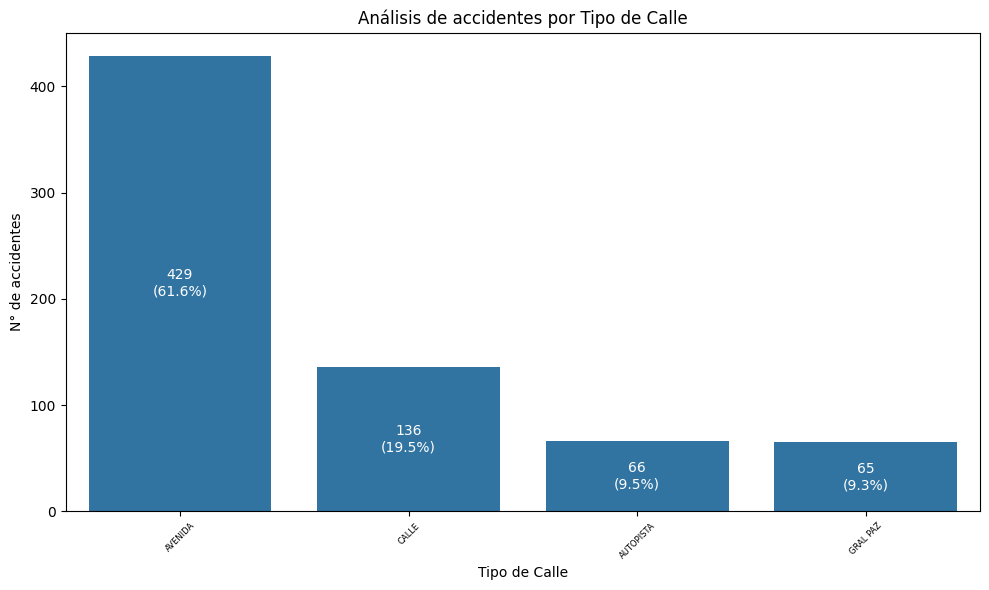

In [54]:
conteo_tipo_calle = df_hechos['Tipo_De_Calle'].value_counts()
total = conteo_tipo_calle.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_tipo_calle.index, y = conteo_tipo_calle.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')
plt.xticks(rotation=45, fontsize=6)
plt.xlabel("Tipo de Calle")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Tipo de Calle")
plt.tight_layout()
plt.show()

El gráfico muestra de manera clara que las avenidas concentran la mayor cantidad de accidentes de tránsito, representando el 61.6% del total. A continuación, le siguen las calles con un 19.5%, mientras que autopistas y la categoría "Gral Paz" (posiblemente una vía específica) presentan porcentajes similares y menores.

### Posibles Interpretaciones:

- Mayor densidad de tráfico: Las avenidas suelen tener un mayor flujo vehicular, lo que aumenta la probabilidad de colisiones.
- Características viales: Las avenidas pueden tener características que las hacen más propensas a accidentes, como intersecciones más complejas, carriles adicionales, o límites de velocidad más altos.
- Comportamiento de los conductores: Los conductores en avenidas podrían tener un comportamiento más arriesgado debido al mayor flujo vehicular o a la percepción de mayor velocidad.

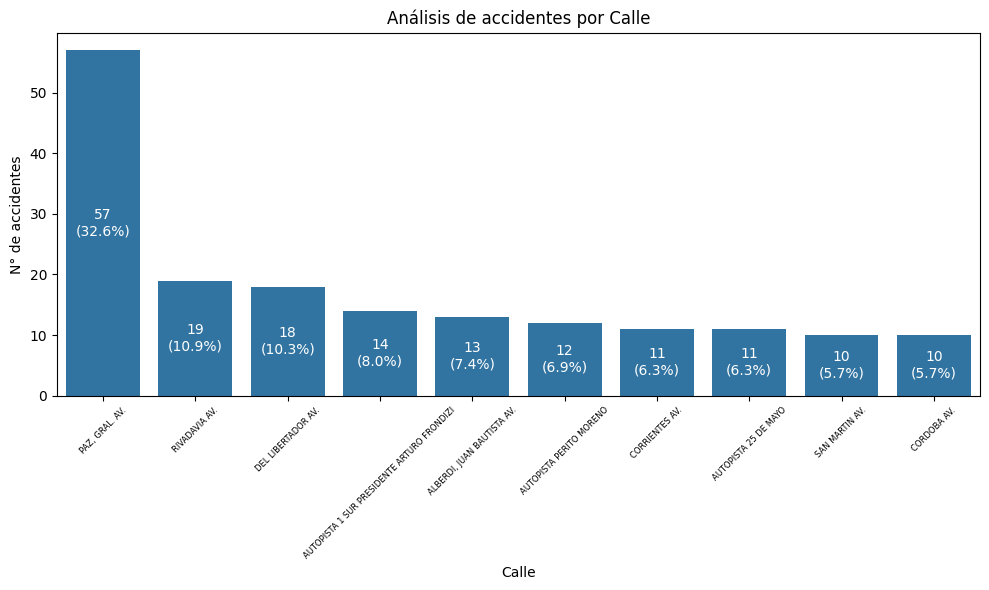

In [58]:
conteo_calle = df_hechos['Calle'].value_counts().head(10)
total = conteo_calle.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_calle.index, y = conteo_calle.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')
plt.xticks(rotation=45, fontsize=6)
plt.xlabel("Calle")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Calle")
plt.tight_layout()
plt.show()


### Análisis del Gráfico: Accidentes por Calle
### Conclusión Principal:

La Avenida General Paz concentra la mayor cantidad de accidentes de tránsito, representando más del 32% del total de incidentes registrados en las calles analizadas.

### Lectura Detallada:

El gráfico presenta una distribución desigual de accidentes entre las diferentes calles. La Avenida General Paz destaca significativamente por encima del resto, seguida por las Avenidas Rivadavia y del Libertador. El resto de las vías muestran una frecuencia de accidentes considerablemente menor.

### Interpretación de los Resultados:

- Avenida General Paz como punto crítico: La alta concentración de accidentes en la Avenida General Paz sugiere que esta vía presenta condiciones o características particulares que la vuelven más propensa a incidentes. Esto podría deberse a diversos factores como:
- Mayor densidad de tráfico: Un elevado flujo vehicular incrementa la probabilidad de colisiones.
- Intersecciones complejas: La presencia de múltiples cruces y vías de acceso puede dificultar la circulación y aumentar el riesgo de accidentes.
- Condiciones viales deficientes: Problemas en el pavimento, señalización inadecuada o falta de iluminación pueden contribuir a la ocurrencia de accidentes.
- Heterogeneidad en la distribución: La variabilidad en la cantidad de accidentes entre las diferentes calles indica que existen factores específicos que influyen en la seguridad vial de cada una de ellas.

Tambien es de igual manera relevante identificar las calles mas seguras. Vamos a consultarlo:

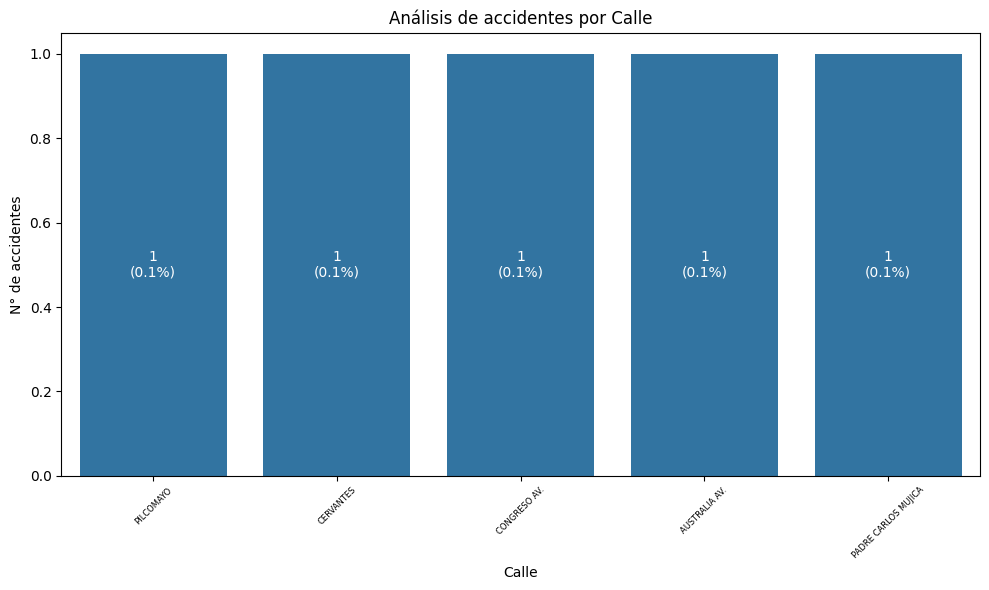

In [62]:
conteo_calle = df_hechos['Calle'].value_counts()
conteo_calle_f = df_hechos['Calle'].value_counts().tail(5)
total = conteo_calle.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_calle_f.index, y = conteo_calle_f.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')
plt.xticks(rotation=45, fontsize=6)
plt.xlabel("Calle")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Calle")
plt.tight_layout()
plt.show()

Aqui se pueden observar aquellas que representan en menor peligro posible en la posibilidad de siniestros. Es realmente crucial esta información ya que estas calles pueden servir de ejemplo, y contener detalles que puedan ayudar a disminuir la posibilidad de ocurra algun otro accidente en otras calles, que son mas propensas a este tipo de episodios.

Ahora nos enfocaremos en la columna de "Cruce"

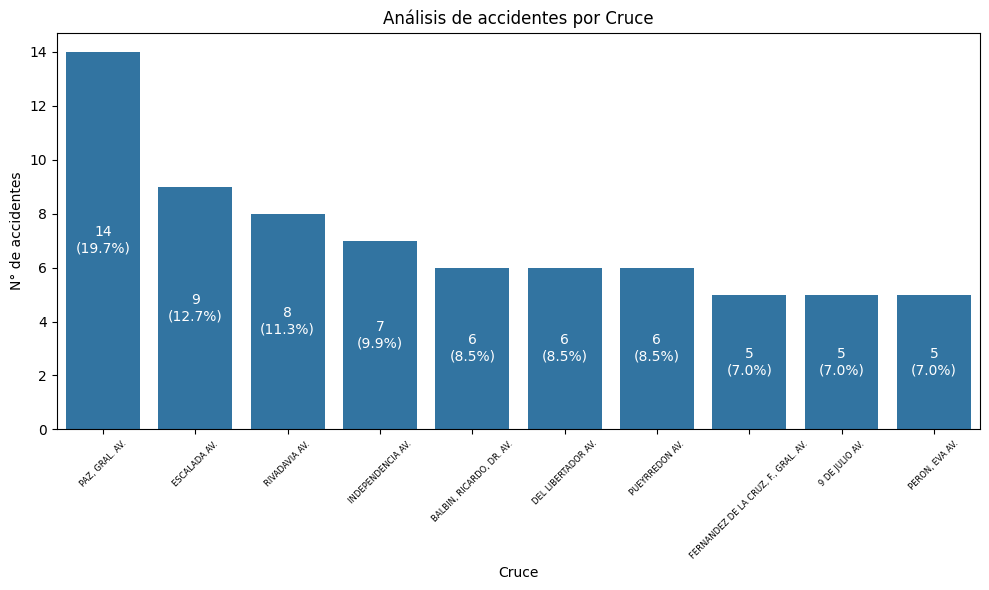

In [66]:
conteo_cruce = df_hechos['Cruce'].value_counts().head(10)
total = conteo_cruce.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_cruce.index, y = conteo_cruce.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')
plt.xticks(rotation=45, fontsize=6)
plt.xlabel("Cruce")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Cruce")
plt.tight_layout()
plt.show()

### Conclusión del gráfico:

La Avenida General Paz concentra la mayor cantidad de accidentes de tránsito entre los cruces analizados, representando casi el 20% del total de incidentes.

### Interpretación:

El gráfico muestra una clara disparidad en la frecuencia de accidentes entre los diferentes cruces. Si bien la Avenida General Paz destaca significativamente, es importante notar que también existen otros cruces con una cantidad considerable de incidentes.

 Es fundamental implementar medidas de seguridad vial específicas para este cruce, como la instalación de semáforos inteligentes, la mejora de la señalización, la reducción de los límites de velocidad y la realización de campañas de concientización vial.

Procederemos a ejercer el mismo analisis en la columna de 'Dirección Normalizada'

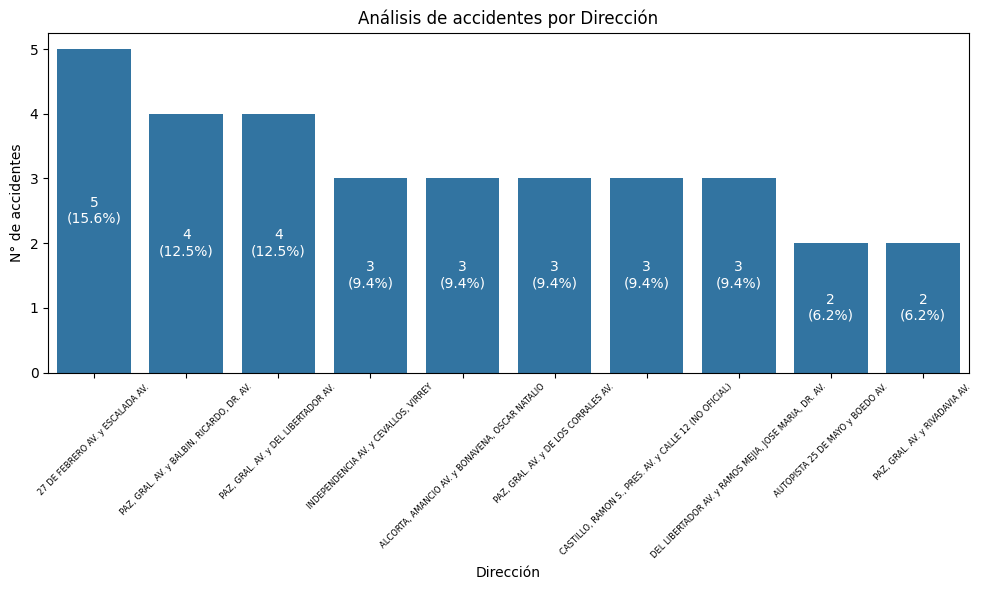

In [69]:
conteo_dir = df_hechos['Dirección Normalizada'].value_counts().head(10)
total = conteo_dir.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_dir.index, y = conteo_dir.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')
plt.xticks(rotation=45, fontsize=6)
plt.xlabel("Dirección")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Dirección")
plt.tight_layout()
plt.show()

### Conclusion de la grafica:

El gráfico indica que la calle 27 de Febrero Av. y Escalada Av presenta la mayor cantidad de accidentes de tránsito entre todos los cruces analizados, representando el 15.6% del total de incidentes. Le siguen muy de cerca las intersecciones de General Paz y Balbín, y General Paz y del Libertador, con un 12.5% cada una.

### Factores influyentes: Las razones detrás de esta concentración de accidentes pueden ser variadas y podrían incluir factores como:
- Características de la intersección: Señalización deficiente, visibilidad reducida, conflictos entre diferentes movimientos de vehículos, etc.
- Volumen de tráfico: Mayor flujo vehicular en ciertas horas del día o días de la semana.
- Comportamiento de los conductores: Velocidad excesiva, conducción distraída, incumplimiento de las señales de tránsito, etc.
- Presencia de peatones o ciclistas: Mayor interacción entre diferentes usuarios de la vía.

Se procederá a hacer el mismo analisis con la columna "Comuna"

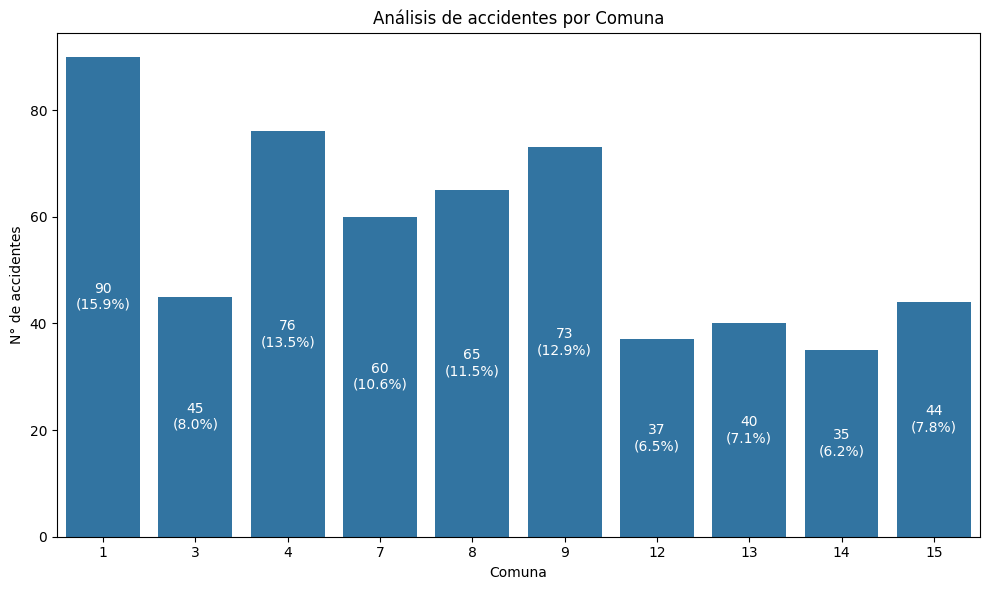

In [74]:
conteo_com = df_hechos['Comuna'].value_counts().head(10)
total = conteo_com.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_com.index, y = conteo_com.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')
plt.xticks(fontsize=10)
plt.xlabel("Comuna")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Comuna")
plt.tight_layout()
plt.show()

### Interpretación:

El gráfico presenta un análisis de la distribución de accidentes de tránsito por comuna. Se observa que existe una variabilidad significativa en la cantidad de accidentes entre las diferentes comunas.

### Conclusiones clave:

Comuna 1: Mayor cantidad de accidentes: La comuna 1 concentra el mayor número de accidentes de tránsito, representando el 15.9% del total. Esto indica que esta comuna presenta un mayor riesgo en términos de seguridad vial.
Desigualdad en la distribución: Las demás comunas presentan una cantidad de accidentes considerablemente menor en comparación con la comuna 1.
Concentración en algunas comunas: Se observa una concentración de accidentes en ciertas comunas específicas (1, 4, 9), lo que sugiere que podrían existir factores comunes que influyen en la alta incidencia de accidentes en estas zonas.

Ahora nos enfocaremos en las columnas 'Participantes', 'Victima' y 'Acusado'.

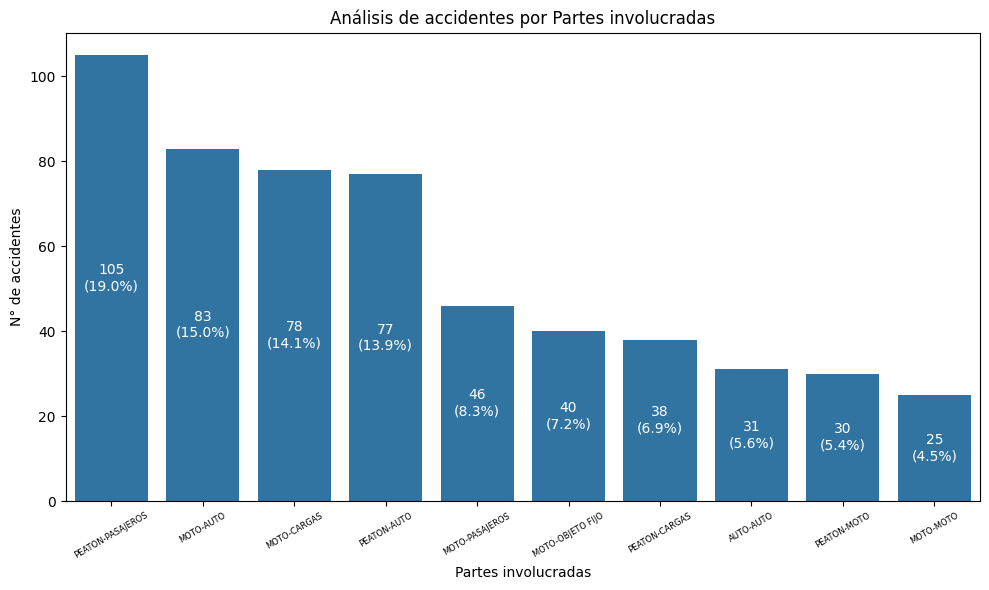

In [78]:
conteo_part = df_hechos['Participantes'].value_counts().head(10)
total = conteo_part.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_part.index, y = conteo_part.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=10, color='white')
plt.xticks(rotation = 30, fontsize=6)
plt.xlabel("Partes involucradas")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Partes involucradas")
plt.tight_layout()
plt.show()

### Interpretación del Gráfico: Análisis de Accidentes por Partes Involucradas
### Conclusión Principal:

El gráfico muestra que los accidentes de tránsito en los que están involucrados peatones y pasajeros representan la mayor proporción de los eventos analizados, constituyendo el 19% del total. Le siguen en frecuencia los accidentes que involucran motos y automóviles.

### Análisis Detallado:

- Dominancia de accidentes con peatones y pasajeros: La alta incidencia de accidentes que involucran a peatones y pasajeros sugiere que existe un problema significativo en la seguridad vial para estos grupos vulnerables. Esto podría indicar la necesidad de mejorar la infraestructura peatonal, implementar medidas de control de velocidad y reforzar campañas de educación vial.
- Alta frecuencia de accidentes con motos: La significativa presencia de accidentes que involucran a motocicletas indica que este tipo de vehículo está altamente expuesto a riesgos en la vía. Esto podría estar relacionado con factores como la falta de protección de los motociclistas, el exceso de velocidad y la conducción imprudente.
- Otros tipos de accidentes: Aunque en menor proporción, también se presentan accidentes que involucran a otros tipos de vehículos y objetos, como camiones y objetos fijos.

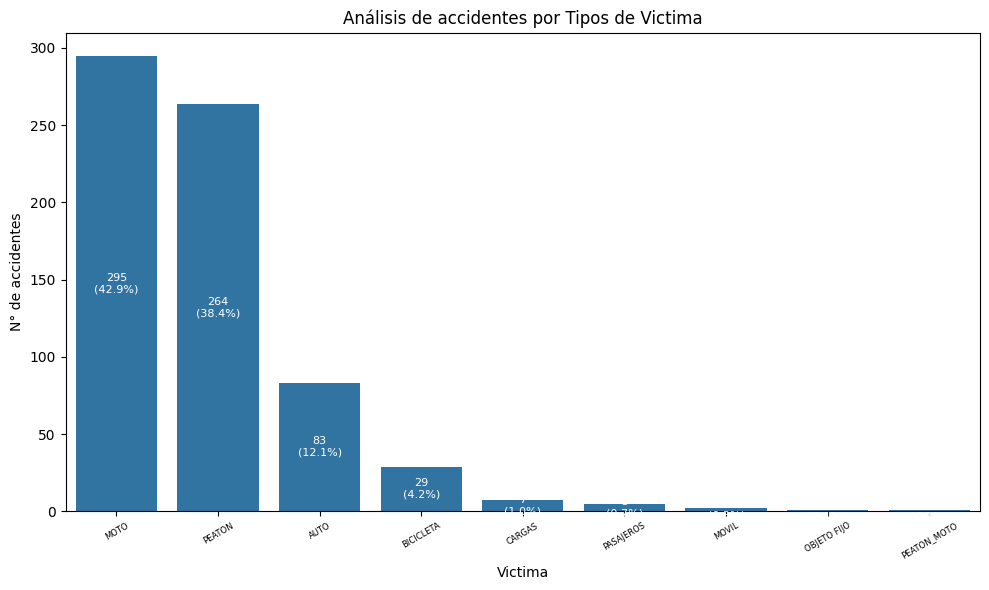

In [80]:
conteo_victima = df_hechos['Victima'].value_counts().head(10)
total = conteo_victima.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_victima.index, y = conteo_victima.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=8, color='white')
plt.xticks(rotation = 30, fontsize=6)
plt.xlabel("Victima")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Tipos de Victima")
plt.tight_layout()
plt.show()

### Interpretación del Gráfico: Análisis de Accidentes por Tipos de Víctima
### Conclusión Principal:
El gráfico evidencia una alarmante tendencia en la que motociclistas y peatones son los actores viales más vulnerables y, por ende, los más afectados por accidentes de tránsito.

### Análisis Detallado:
- Dominancia de motocicletas y peatones: Es claro que tanto motociclistas como peatones representan una proporción desproporcionadamente alta del total de víctimas en accidentes de tránsito. Esto sugiere una serie de factores que incrementan su vulnerabilidad en las vías, como la falta de protección en caso de colisión, la exposición a condiciones climáticas adversas y la convivencia con vehículos más grandes y pesados.
- Vulnerabilidad de peatones: Los peatones, al no contar con ninguna protección física, son especialmente vulnerables a las lesiones graves y fatales en caso de colisión con vehículos.
- Riesgo para motociclistas: Los motociclistas, a pesar de contar con un casco, están expuestos a un riesgo considerable debido a la falta de protección en otras partes del cuerpo y a la inestabilidad del vehículo.
- Otros actores viales: Si bien en menor medida, otros actores viales como automovilistas, ciclistas y pasajeros también se ven involucrados en accidentes, aunque en menor proporción.

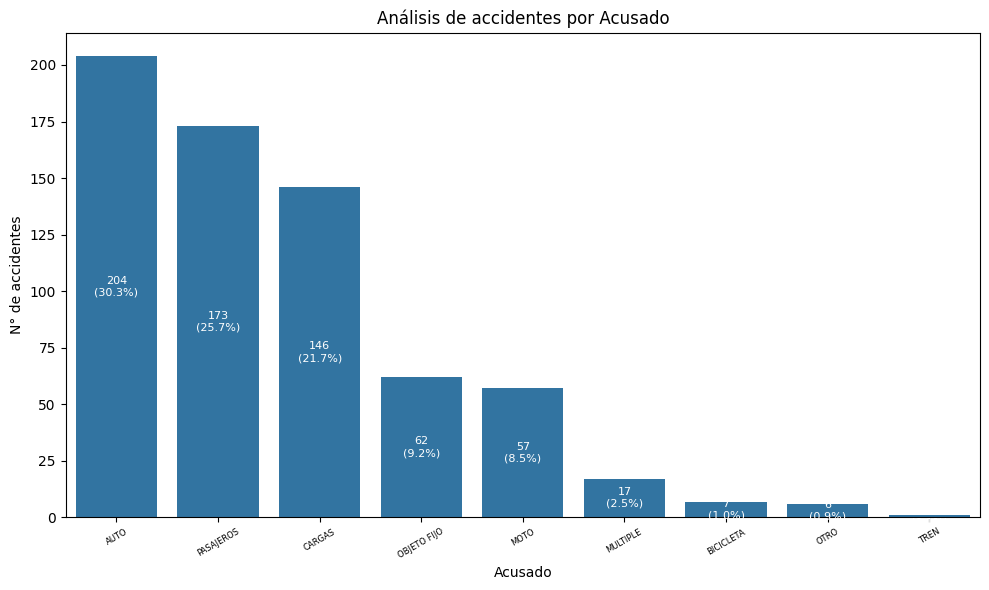

In [81]:
conteo_acusado = df_hechos['Acusado'].value_counts()
total = conteo_acusado.sum()

plt.figure(figsize=(10,6))

barplot = sns.barplot(x = conteo_acusado.index, y = conteo_acusado.values)

for p in barplot.patches:
   
    value = int(p.get_height())
    percentage = value / total * 100
    
    barplot.annotate(f'{value}\n({percentage:.1f}%)', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center', fontsize=8, color='white')
plt.xticks(rotation = 30, fontsize=6)
plt.xlabel("Acusado")
plt.ylabel("N° de accidentes")
plt.title("Análisis de accidentes por Acusado")
plt.tight_layout()
plt.show()

### Interpretación del Gráfico: Análisis de Accidentes por Acusado
### Conclusión Principal:

El gráfico evidencia que los automóviles son los principales causantes de accidentes de tránsito, representando el 30.3% del total de incidentes. Esto sugiere una necesidad imperante de implementar medidas regulatorias más estrictas para los conductores de automóviles, así como para los vehículos de transporte de pasajeros y carga.

### Análisis Detallado:

- Dominancia de automóviles: La alta incidencia de accidentes causados por automóviles resalta la importancia de este tipo de vehículo como factor de riesgo en las vías. Esto puede estar relacionado con diversos factores como el exceso de velocidad, la conducción distraída, el incumplimiento de las normas de tránsito y la falta de mantenimiento de los vehículos.
- Vehículos de transporte de pasajeros y carga: Estos vehículos, aunque en menor proporción, también contribuyen significativamente a la ocurrencia de accidentes. Su mayor tamaño y peso los convierten en una amenaza para otros usuarios de la vía, especialmente para motocicletas y peatones.
- Otros actores viales: Si bien en menor medida, otros actores como motocicletas, objetos fijos y múltiples vehículos también están involucrados en accidentes.

Para seguir con este analisis exploratorio utilizaremos otra herramienta: El Mapa de Correlación. Esta herramienta nos permitirá ver el tipo de relación y su magnitud, que puede existir entre las variables.

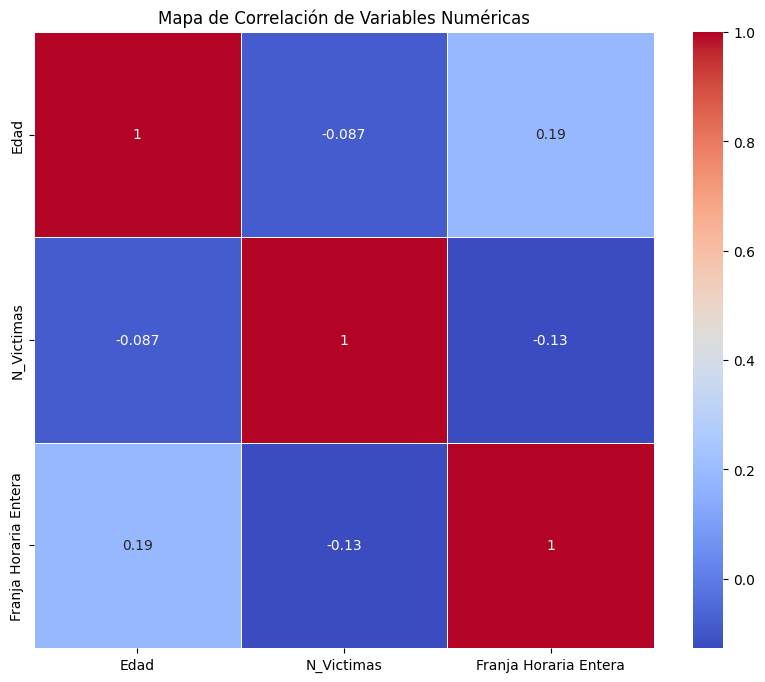

In [111]:
# Primero escogeremos las variables de tipo númerico.
df_cor = df_merged[['Edad', 'N_Victimas', 'Franja Horaria Entera']]
plt.figure(figsize=(10, 8))
correlation_matrix = df_cor.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Correlación de Variables Numéricas")
plt.show()

### Conclusiones:

Basándonos en esta matriz, podemos concluir que:

No hay una relación fuerte entre las variables: Los valores de correlación son cercanos a cero en todos los casos, lo que indica que las variables no están muy relacionadas entre sí.
Las relaciones existentes son muy débiles: Las pequeñas correlaciones que encontramos no son estadísticamente significativas, por lo que no podemos afirmar con certeza que exista una relación causal entre las variables.

Continuaremos con este analisis llevando a cabo un análisis multivariable.

Veremos el numero de victimas al mes, año etiquetado por el género.

In [163]:
# Agrupamos por año y geri
victimas_año_genero = df_merged.groupby(['Año_Hechos', 'Genero'])['N_Victimas'].sum().reset_index()

# Agrupar por mes y género
victimas_mes_genero = df_merged.groupby(['Mes', 'Genero'])['N_Victimas'].sum().reset_index()

Procedemos a graficar.

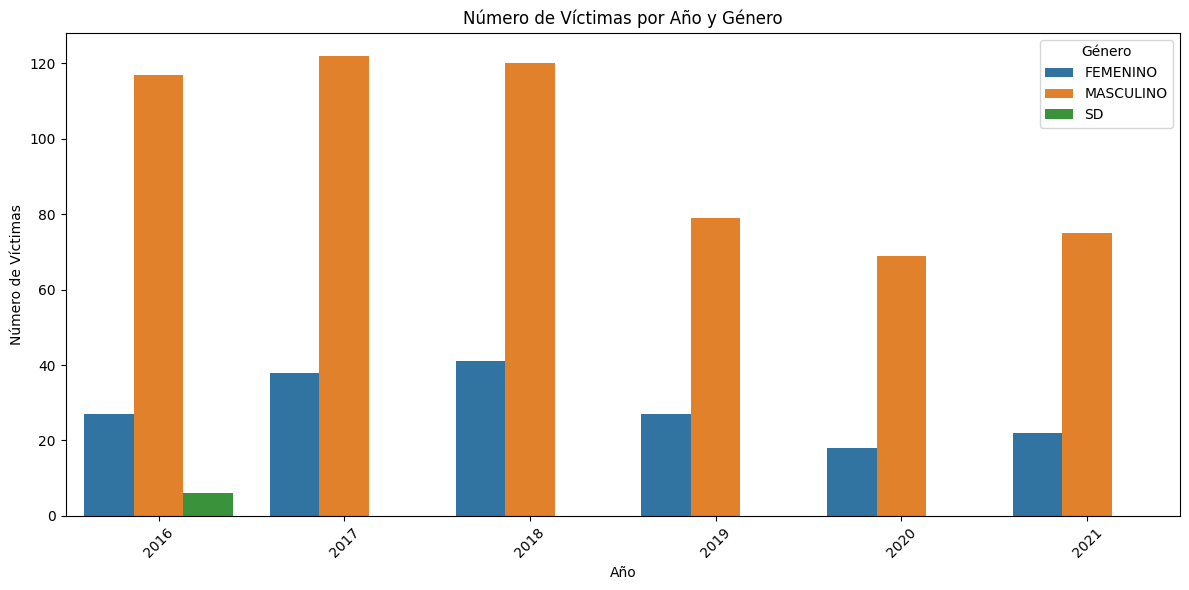

In [172]:
plt.figure(figsize=(12, 6))
sns.barplot(data=victimas_año_genero, x='Año_Hechos', y='N_Victimas', hue='Genero')
plt.title('Número de Víctimas por Año y Género')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

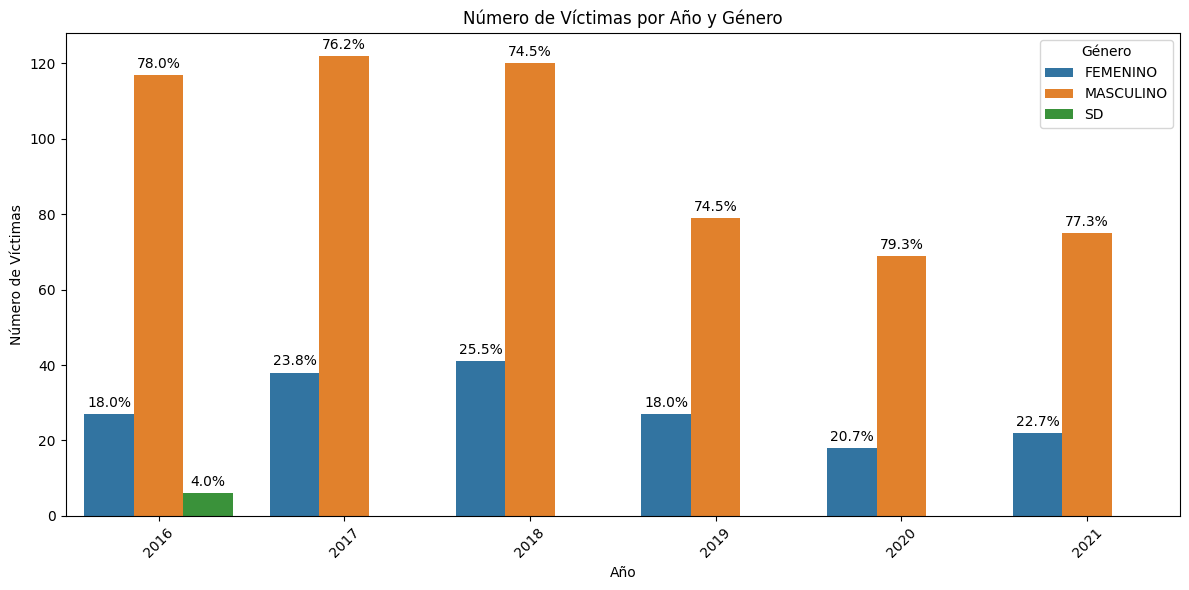

In [174]:
totales_por_año = victimas_año_genero.groupby('Año_Hechos')['N_Victimas'].transform('sum')

# Porcentaje
victimas_año_genero['Porcentaje'] = (victimas_año_genero['N_Victimas'] / totales_por_año) * 100

# Grafico
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=victimas_año_genero, x='Año_Hechos', y='N_Victimas', hue='Genero')
plt.title('Número de Víctimas por Año y Género')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.legend(title='Género')
plt.xticks(rotation=45)

for p in barplot.patches:

    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = height

    # Extraer el género de la barra
    genero = p.get_facecolor()  

    # Filtrar el DataFrame para obtener el porcentaje correspondiente
    fila = victimas_año_genero[victimas_año_genero['N_Victimas'] == height]
    
    if not fila.empty:  
        porcentaje = fila['Porcentaje'].values[0]  
        # Se agrega el porcentaje en la barra
        barplot.annotate(f'{porcentaje:.1f}%', 
                         (x, y),  
                         ha='center', va='bottom', fontsize=10, color='black',  
                         xytext=(0, 3),  
                         textcoords='offset points')

plt.tight_layout()
plt.show()

### Interpretación General:

El gráfico muestra una clara tendencia a lo largo de los años 2016-2021:

Mayor número de víctimas masculinas: En todos los años analizados, el número de víctimas masculinas supera significativamente al de las mujeres. Esto indica que los hombres están expuestos a un mayor riesgo de sufrir accidentes con consecuencias fatales.
Estabilidad en la proporción: A pesar de las fluctuaciones en el número absoluto de víctimas, la proporción entre hombres y mujeres se mantiene relativamente estable a lo largo del período, lo que sugiere que las causas subyacentes a esta disparidad persisten.
### Conclusiones Principales:

- Dominancia Masculina: Los hombres representan una proporción significativamente mayor de víctimas en comparación con las mujeres en todos los años analizados. Esto sugiere que existen factores socioculturales, conductuales o relacionados con la infraestructura vial que podrían explicar esta disparidad.
- Tendencia Estabilizada: A pesar de la mayor proporción de víctimas masculinas, no se observa una tendencia clara de aumento o disminución en el número de víctimas a lo largo del período analizado. Esto podría indicar que las medidas preventivas implementadas han logrado estabilizar la situación.

Ahora haremos el análisis por mes.

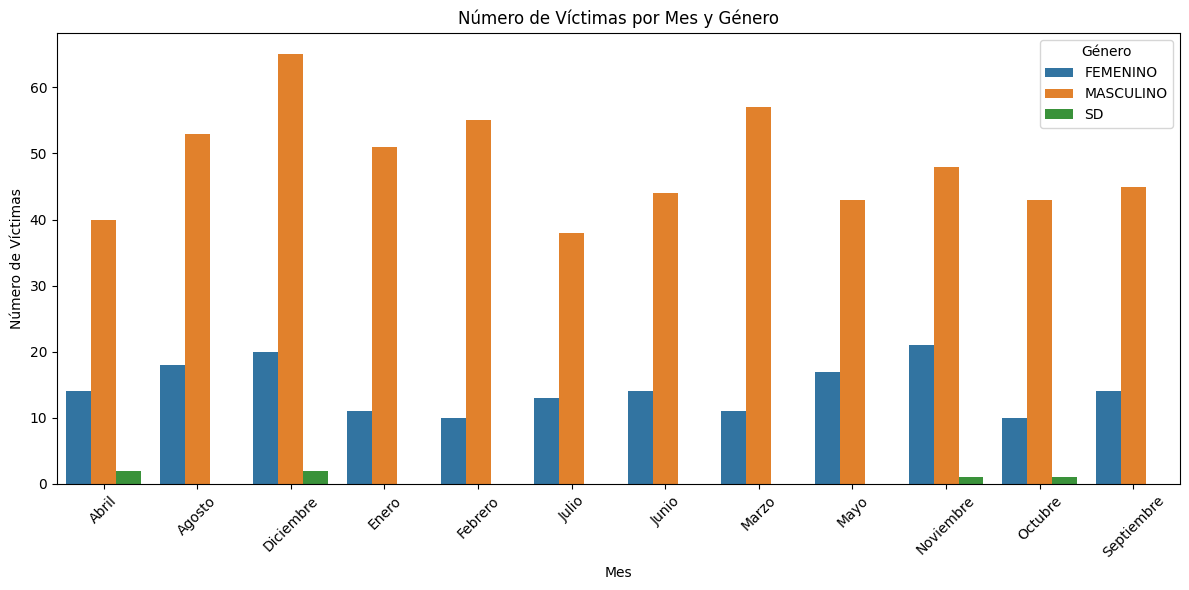

In [182]:
plt.figure(figsize=(12, 6))
sns.barplot(data=victimas_mes_genero, x='Mes', y='N_Victimas', hue='Genero')
plt.title('Número de Víctimas por Mes y Género')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación del Gráfico: Número de Víctimas por Mes y Género
El gráfico muestra una clara tendencia a lo largo de los meses analizados:

- Mayor número de víctimas masculinas: En todos los meses analizados, el número de víctimas masculinas supera significativamente al de las mujeres. Esto indica que los hombres están expuestos a un mayor riesgo de sufrir accidentes con consecuencias fatales.
- Fluctuaciones mensuales: A diferencia del gráfico anterior donde se analizaba por año, aquí se observan fluctuaciones más marcadas en el número de víctimas a lo largo de los meses. Esto sugiere que pueden existir factores estacionales o relacionados con eventos específicos que influyen en la cantidad de accidentes.
- Mayor incidencia en ciertos meses: Algunos meses presentan un número significativamente mayor de víctimas en comparación con otros. Esto podría estar relacionado con factores como las vacaciones, las condiciones climáticas, o eventos especiales que aumentan la circulación vehicular o la actividad al aire libre.

Ahora lo haremos por Rango etario

In [183]:
# Agrupar por año y rango etario
victimas_año_rango = df_merged.groupby(['Año_Hechos', 'Rango_Etario'])['N_Victimas'].sum().reset_index()

# Agrupar por mes y rango etario
victimas_mes_rango = df_merged.groupby(['Mes', 'Rango_Etario'])['N_Victimas'].sum().reset_index()


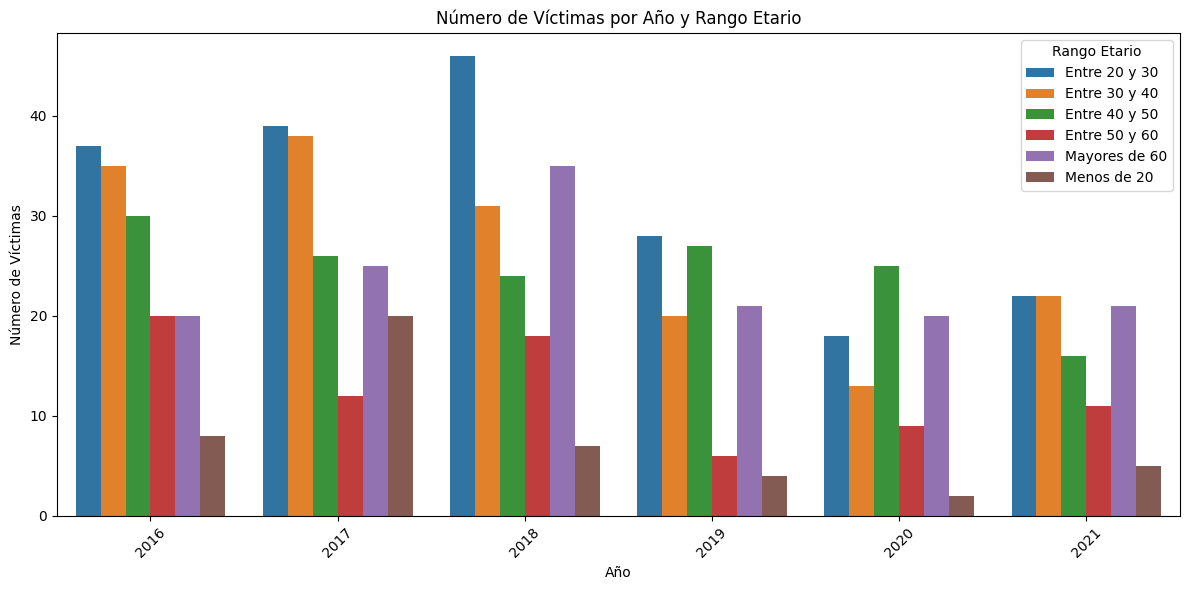

In [184]:
# Procedemos a graficar

plt.figure(figsize=(12, 6))
sns.barplot(data=victimas_año_rango, x='Año_Hechos', y='N_Victimas', hue='Rango_Etario')
plt.title('Número de Víctimas por Año y Rango Etario')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.legend(title='Rango Etario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Análisis del Gráfico: Número de Víctimas por Año y Rango Etario
### Interpretación General:

El gráfico presenta una distribución de víctimas por año y rango etario, permitiendo identificar patrones y tendencias en la ocurrencia de eventos que resultan en víctimas.

### Observaciones Principales:

- Mayor concentración en ciertos rangos etarios: Se observa una mayor concentración de víctimas en los rangos etarios entre 20 y 40 años, lo que sugiere que este grupo poblacional podría estar más expuesto a situaciones de riesgo.
- Fluctuaciones anuales: El número de víctimas varía de un año a otro, lo que indica que pueden existir factores estacionales o coyunturales que influyen en la ocurrencia de eventos.
- Tendencia general: Aunque existen fluctuaciones, se puede apreciar una tendencia general en la distribución de víctimas por rango etario a lo largo de los años analizados.

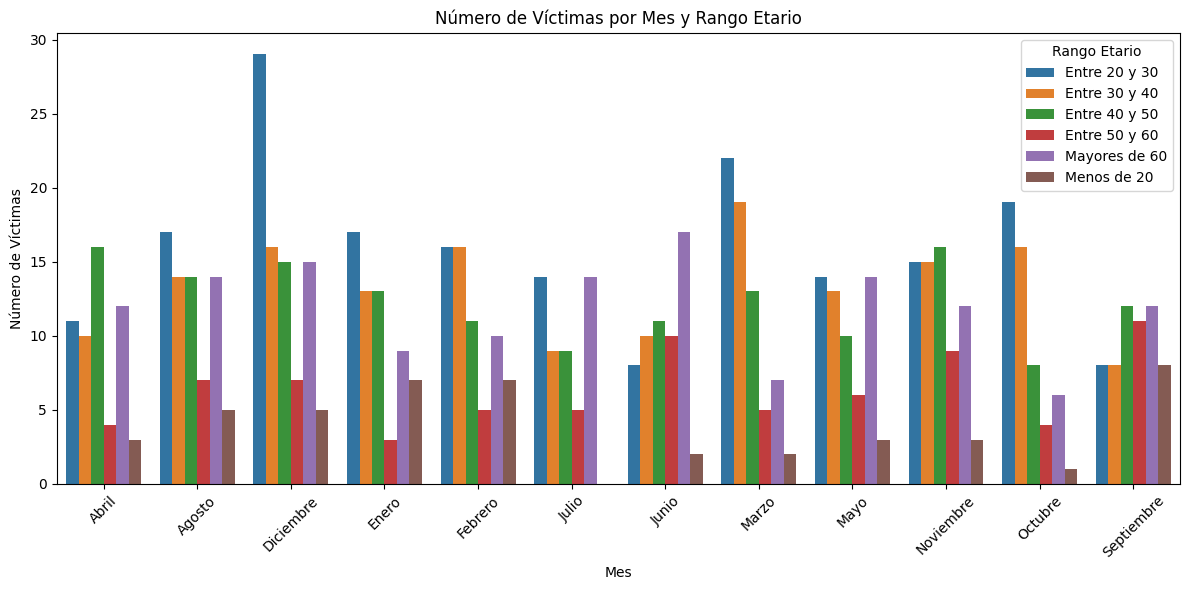

In [185]:
plt.figure(figsize=(12, 6))
sns.barplot(data = victimas_mes_rango, x ='Mes', y ='N_Victimas', hue = 'Rango_Etario')
plt.title('Número de Víctimas por Mes y Rango Etario')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.legend(title='Rango Etario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Análisis del Gráfico: Número de Víctimas por Mes y Rango Etario
### Interpretación General:

El gráfico presenta una distribución de víctimas por mes y rango etario, permitiendo identificar patrones y tendencias en la ocurrencia de eventos que resultan en víctimas.

### Observaciones Principales:

- Mayor concentración en ciertos rangos etarios: Se observa una mayor concentración de víctimas en los rangos etarios entre 20 y 40 años, lo que sugiere que este grupo poblacional podría estar más expuesto a situaciones de riesgo. Tambien existen episodios dodne le grupo poblacional de 40 y 50 años protagoniza ya sea, el porcentaje mas alto, o un porcentaje importante de siniestros.
- Fluctuaciones anuales: El número de víctimas varía de un mes a otro, lo que indica que pueden existir factores estacionales o coyunturales que influyen en la ocurrencia de eventos.
- Tendencia general: Aunque existen fluctuaciones, se puede apreciar una tendencia general en la distribución de víctimas por rango etario a lo largo de los años analizados.
- Se destaca diciembre por ser el mes con mayor cantidad de siniestros y en el cual la poblacion de 20 a 30 es la mas afectada, con una diferencia relamente considerable.

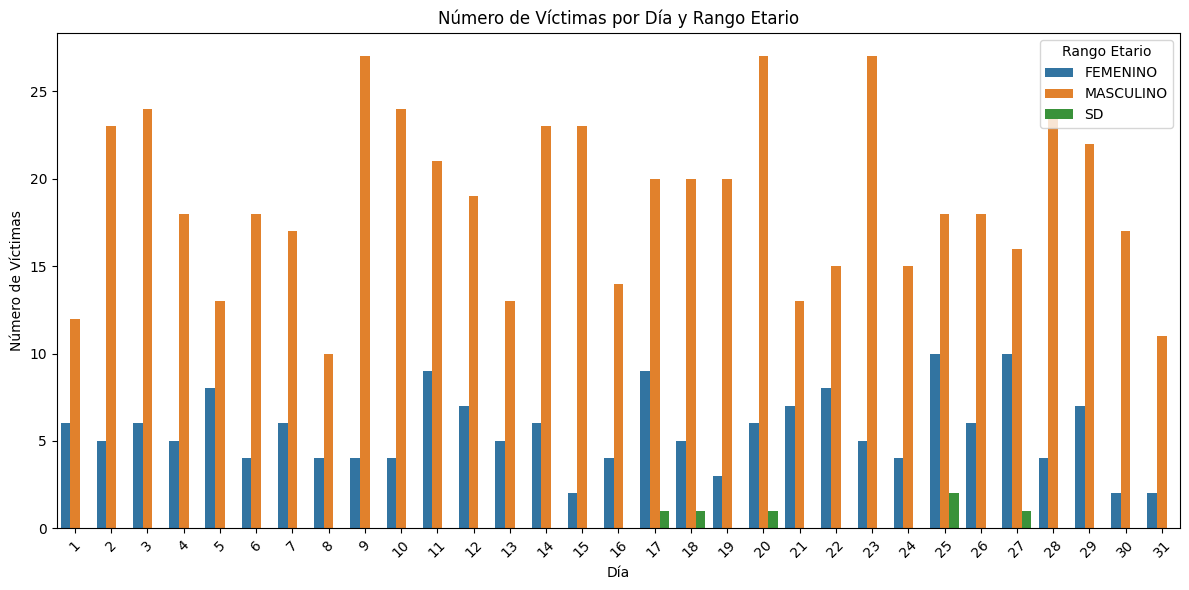

In [194]:
group_dia_genero = df_merged.groupby(["Día_Victima", "Genero"])["N_Victimas"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data = group_dia_genero, x='Día_Victima', y='N_Victimas', hue='Genero')
plt.title('Número de Víctimas por Día y Genero')
plt.xlabel('Día')
plt.ylabel('Número de Víctimas')
plt.legend(title ='Rango Etario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análisis del Gráfico: Número de Víctimas por Día y Genero
### Interpretación General:

El gráfico presenta una distribución de víctimas por día y genero, permitiendo identificar patrones y tendencias en la ocurrencia de eventos que resultan en víctimas.

### Observaciones Principales:

- Mayor concentración en ciertos rangos etarios: Se observa una mayor concentración de víctimas en el genero masculino, lo que sugiere que este grupo poblacional podría estar más expuesto a situaciones de riesgo. 
- Fluctuaciones diarias: El número de víctimas varía de un día a otro, lo que indica que pueden existir factores estacionales o coyunturales que influyen en la ocurrencia de eventos.
- Tendencia general: Aunque existen fluctuaciones, se puede apreciar una tendencia general en la distribución de víctimas por genero a lo largo de los dias en observacion. De nuevo, se destaca el genero masculino como el genero con mayor poblacion en rol de victima.


In [204]:
df_victimas["Rol"].value_counts()

Rol
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

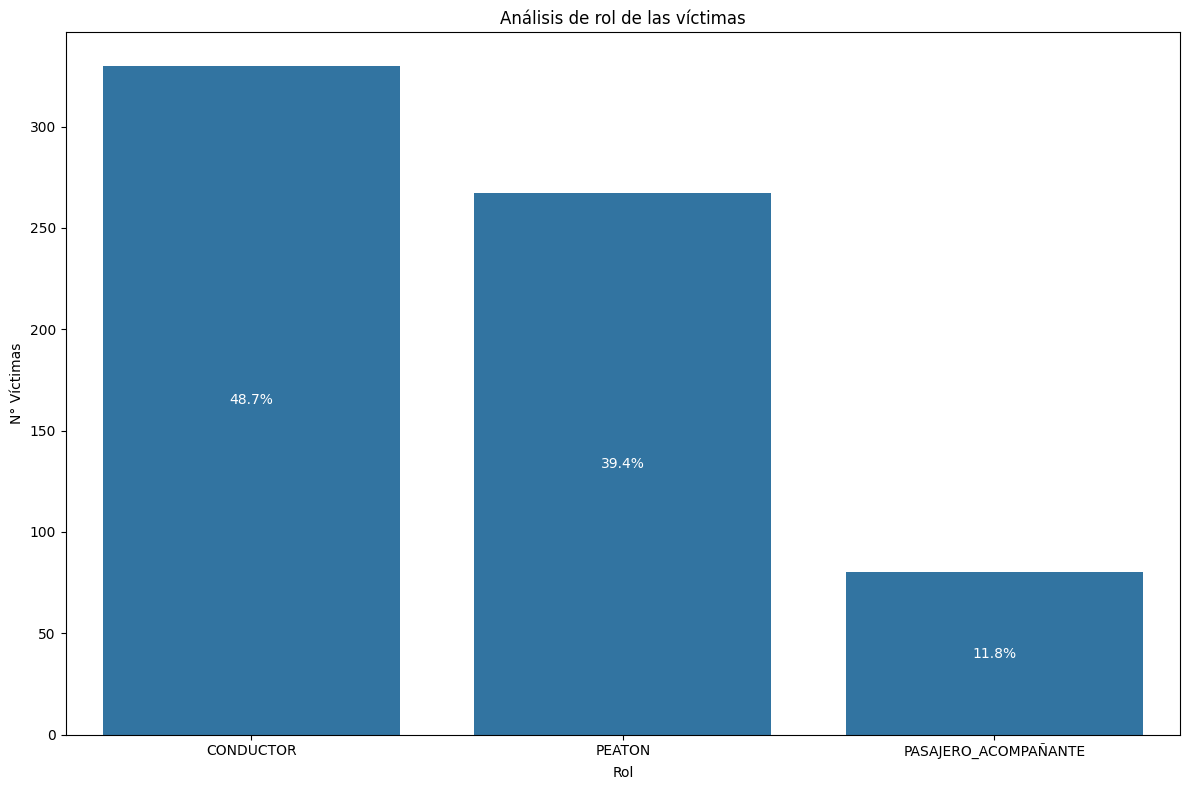

In [212]:
# Contamos el número de ocurrencias de cada rol (solo los 3 primeros)
prop_rol = df_victimas["Rol"].value_counts().head(3)

# Calculamos los porcentajes
total_victimas = prop_rol.sum()
porcentajes = (prop_rol / total_victimas) * 100

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=prop_rol.index, y=prop_rol.values)
plt.xlabel("Rol")
plt.ylabel("N° Víctimas")
plt.title("Análisis de rol de las víctimas")

# Añadimos los porcentajes como anotaciones en el centro de las barras
for i, p in enumerate(barplot.patches):
    barplot.annotate(f'{porcentajes.iloc[i]:.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  # En el centro vertical de la barra
                     ha='center', va='center', fontsize=10, color='white')

# Ajustamos el layout
plt.tight_layout()

# Mostramos el gráfico
plt.show()



### Interpretación del Gráfico: Análisis del Rol de las Víctimas
El gráfico muestra la distribución de las víctimas de un evento (posiblemente accidentes de tránsito) según su rol en el momento del suceso.

### Conclusiones clave:
- Conductores: La mayoría de las víctimas. La categoría "Conductor" representa la mayor proporción de víctimas, con un 48.7% del total. Esto indica que los conductores son los más expuestos a riesgos en el contexto analizado.
- Peatones: Segundo grupo más afectado. Los peatones representan el segundo grupo más numeroso de víctimas, con un 39.4% del total. Esto sugiere que la seguridad vial para peatones es un aspecto importante a considerar.
- Pasajeros acompañantes: Menor proporción. La categoría "Pasajero acompañante" presenta la menor proporción de víctimas, con un 11.8%. Esto no significa que este grupo esté exento de riesgos, pero sí indica que su exposición es menor en comparación con los conductores y peatones.

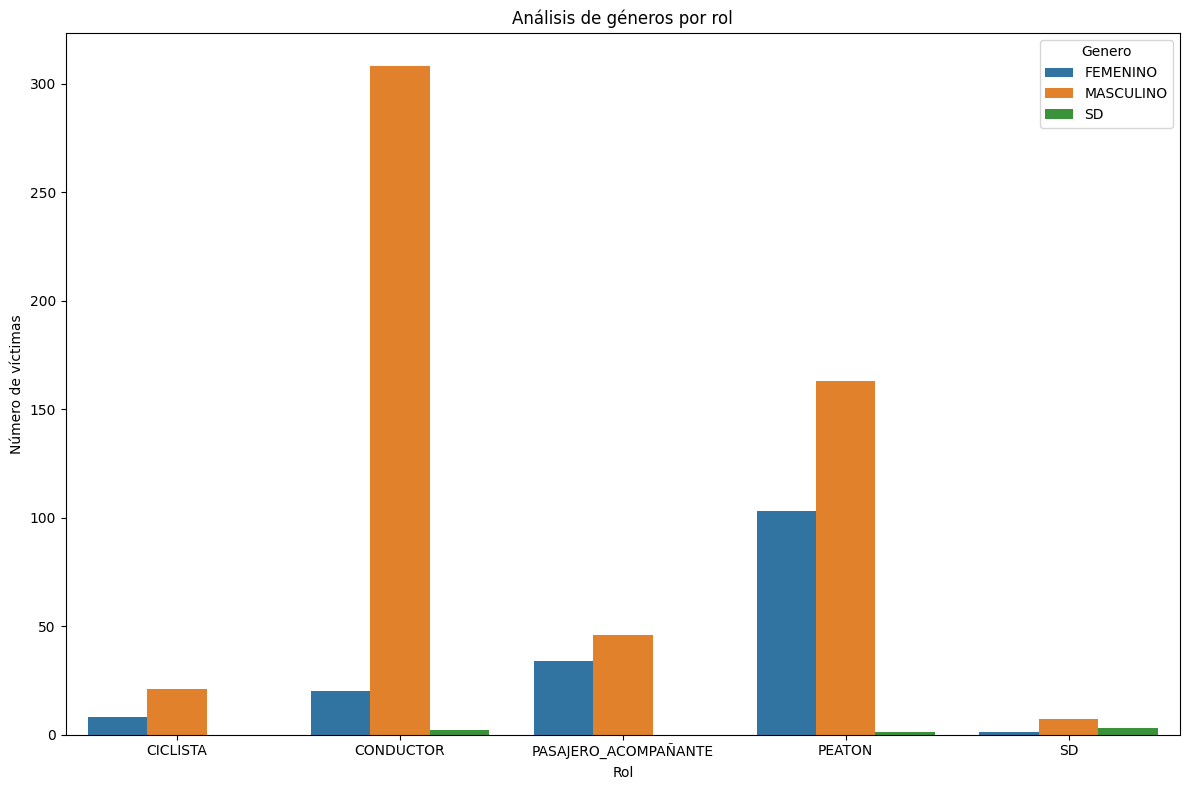

In [215]:
# Agrupamos por 'Rol' y 'Genero' y contamos las ocurrencias
group_rol_genero = df_victimas.groupby(["Rol", "Genero"]).size().reset_index(name="count")

# Creamos el gráfico de barras con los datos agrupados
plt.figure(figsize=(12, 8))
sns.barplot(x="Rol", y="count", data=group_rol_genero, hue="Genero")
plt.xlabel("Rol")
plt.ylabel("Número de víctimas")
plt.title("Análisis de géneros por Rol")
plt.tight_layout()
plt.show()


### Interpretación del Gráfico: Análisis de Géneros por Rol en Accidentes
El gráfico presenta la distribución de víctimas por género y rol en un determinado tipo de evento, posiblemente accidentes de tránsito.

### Conclusiones Clave:
- Dominancia Masculina: Es evidente una marcada tendencia hacia el género masculino en la mayoría de los roles, especialmente en las categorías de conductor y peatón. Esto sugiere una mayor exposición al riesgo para los hombres en estos contextos.
- Conductores: La categoría de "conductor" presenta la mayor cantidad de víctimas, principalmente hombres. Esto podría indicar factores como mayor participación masculina en la conducción, diferencias en los hábitos de conducción o una mayor exposición a riesgos laborales relacionados con la conducción.
- Peatones: Al igual que en el caso de los conductores, los hombres representan una proporción mayor de las víctimas peatones. Esto podría estar relacionado con factores como rutas de transporte, hábitos de movilidad y exposición a zonas de alto riesgo.
- Pasajeros Acompañantes: Si bien los datos son menos claros en esta categoría, se observa una tendencia similar con una mayor proporción de hombres.
- Ciclistas: La categoría de "ciclista" muestra un patrón similar, con una mayor proporción de hombres como víctimas.

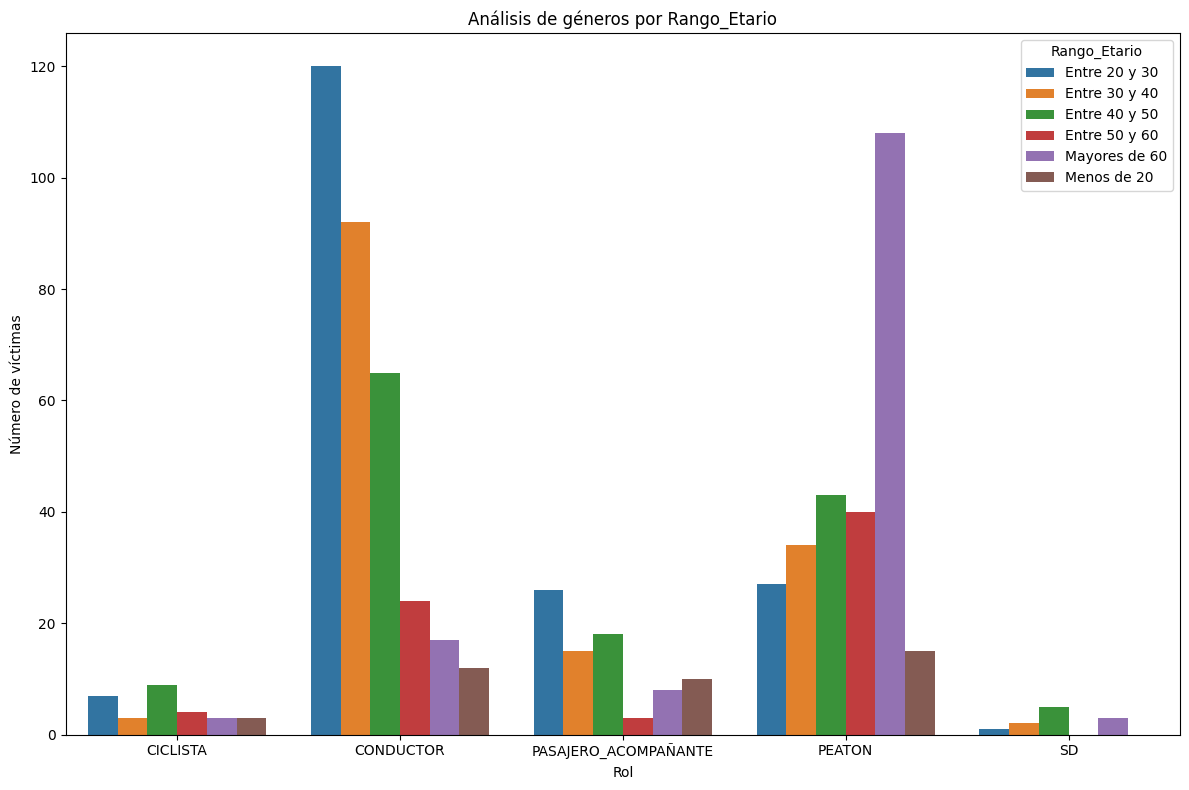

In [221]:
group_rol_rango = df_victimas.groupby(["Rol", "Rango_Etario"]).size().reset_index(name="count")
plt.figure(figsize=(12,8))
sns.barplot(x = "Rol", y = "count", hue = "Rango_Etario", data = group_rol_rango)
plt.xlabel("Rol")
plt.ylabel("Número de víctimas")
plt.title("Análisis de géneros por Rango_Etario")
plt.tight_layout()
plt.show()


### Análisis del Gráfico: Géneros por Rango Etario y Rol en el Accidente
El gráfico presenta una interesante distribución de víctimas según su género, rango etario y el rol que desempeñaban en el momento del accidente.

### Conclusiones Principales:
Dominancia de los Conductores en Edad Adulta:

- El grupo de conductores entre 20,y 40 años presenta la mayor cantidad de víctimas. Esto sugiere que la población adulta joven es la más expuesta a riesgos en la conducción.
Otros rangos de edad dentro de la población adulta también muestran una alta incidencia de accidentes de tránsito entre conductores.
Peatones Jóvenes y Adultos:

- Los peatones, especialmente en los rangos de edad entre 20 y 40 años y entre 40 y 50 años, muestran una significativa cantidad de víctimas. Esto podría indicar una mayor exposición al riesgo en zonas urbanas o una menor precaución en estos grupos etarios.
Ciclistas Jóvenes:

- El grupo de ciclistas menores de 20 años presenta una proporción considerable de víctimas, lo que podría estar relacionado con la falta de experiencia, el uso inadecuado de protección o la exposición a rutas peligrosas.
Pasajeros Acompañantes:

- Los pasajeros acompañantes muestran una distribución más uniforme a lo largo de los diferentes rangos etarios, aunque con una ligera tendencia hacia los grupos de edad más jóvenes.
Otros Roles:

- La categoría "SD" (posiblemente sin definir o género no binario) presenta un número muy bajo de víctimas, lo que dificulta una interpretación significativa.

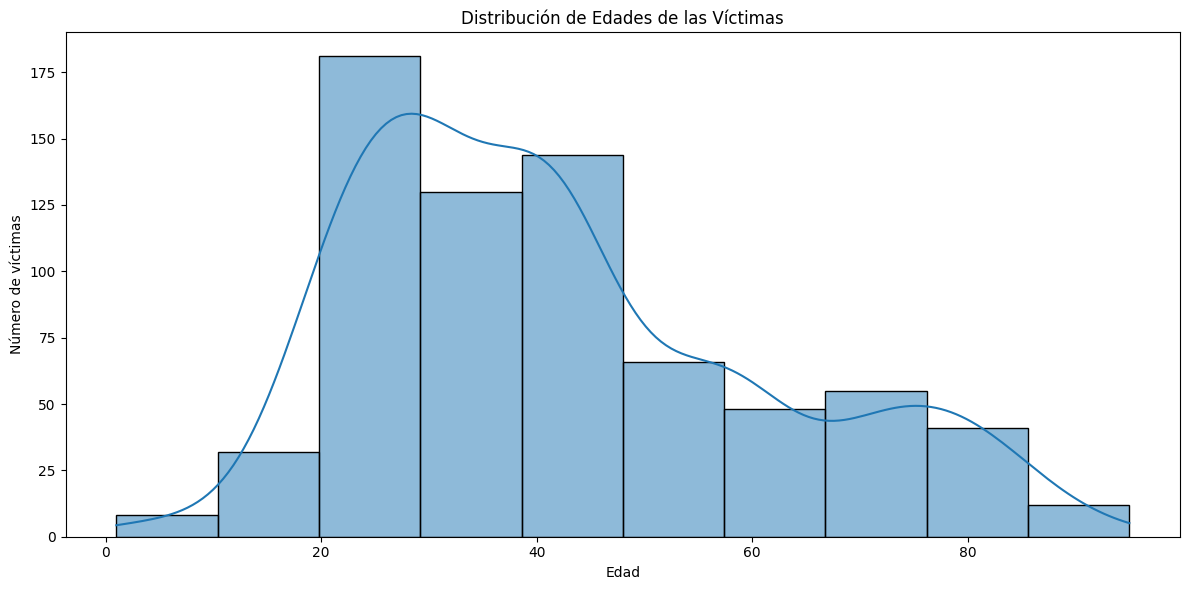

In [225]:
plt.figure(figsize=(12, 6))
sns.histplot(df_victimas['Edad'], bins=10, kde=True)
plt.xlabel("Edad")
plt.ylabel("Número de víctimas")
plt.title("Distribución de Edades de las Víctimas")
plt.tight_layout()
plt.show()


### Interpretación del Gráfico: Distribución de Edades de las Víctimas
El gráfico muestra la frecuencia con la que ocurren diferentes edades entre las víctimas de un determinado evento.

### Conclusiones Clave:
- Concentración en Edades Adultas: La mayoría de las víctimas se concentran en los grupos de edad comprendidos entre los 20 y 60 años. Esto sugiere que estos grupos etarios están más expuestos al riesgo del evento en cuestión.
- Distribución Bimodal: La distribución de las edades parece tener una forma bimodal, con dos picos principales. Esto indica que podría haber dos grupos de edad con mayor riesgo, posiblemente relacionados con diferentes factores o circunstancias.
- Disminución en Extremos: Tanto en edades muy jóvenes como muy avanzadas, se observa una menor frecuencia de víctimas. Esto podría deberse a diferentes factores, como menor exposición a riesgos en los grupos más jóvenes o mayor protección en los grupos más mayores.

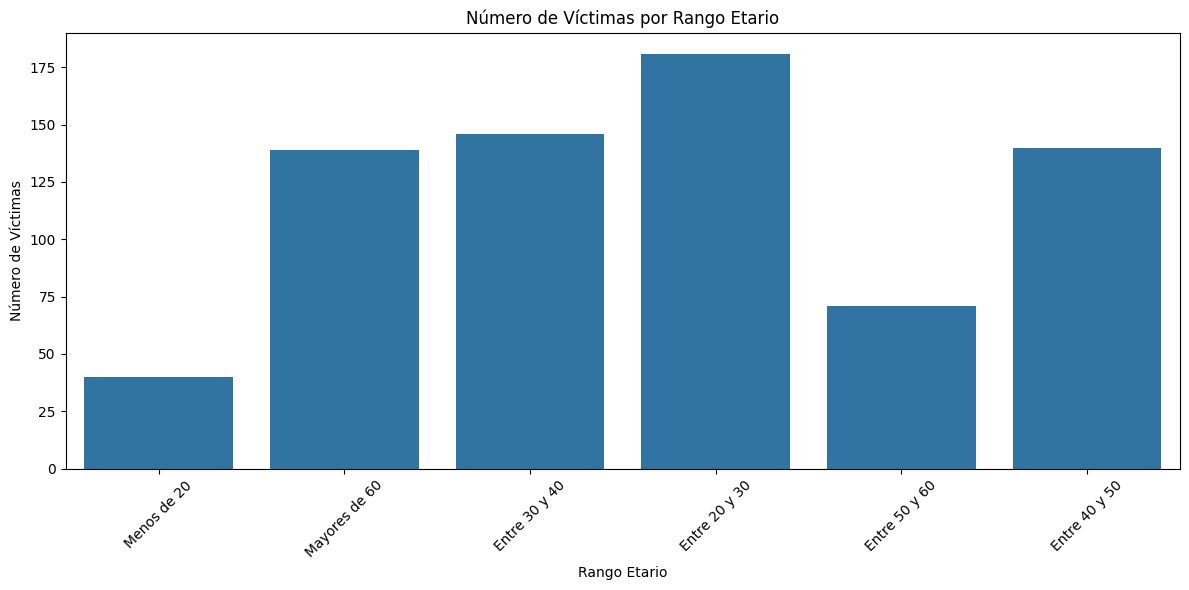

In [226]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Rango_Etario", data=df_victimas)
plt.xlabel("Rango Etario")
plt.ylabel("Número de Víctimas")
plt.title("Número de Víctimas por Rango Etario")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación del Gráfico: Número de Víctimas por Rango Etario
El gráfico muestra la distribución de víctimas según su rango de edad.

### Conclusiones Clave:
- Mayoría de Víctimas en Adultos Jóvenes: Se observa una mayor concentración de víctimas en los rangos de edad comprendidos entre los 20 y 40 años. Esto sugiere que este grupo etario es el más vulnerable al evento o situación que está siendo analizado.
- Menor Número de Víctimas en Extremos: Tanto en los extremos de edad (menores de 20 años y mayores de 60 años) se observa una menor cantidad de víctimas. Esto podría indicar una menor exposición al riesgo o una mayor protección para estos grupos.
- Distribución Bimodal: La distribución parece tener una forma ligeramente bimodal, con dos picos principales. Esto sugiere que podrían existir dos grupos de edad con características particulares que los hacen más vulnerables.

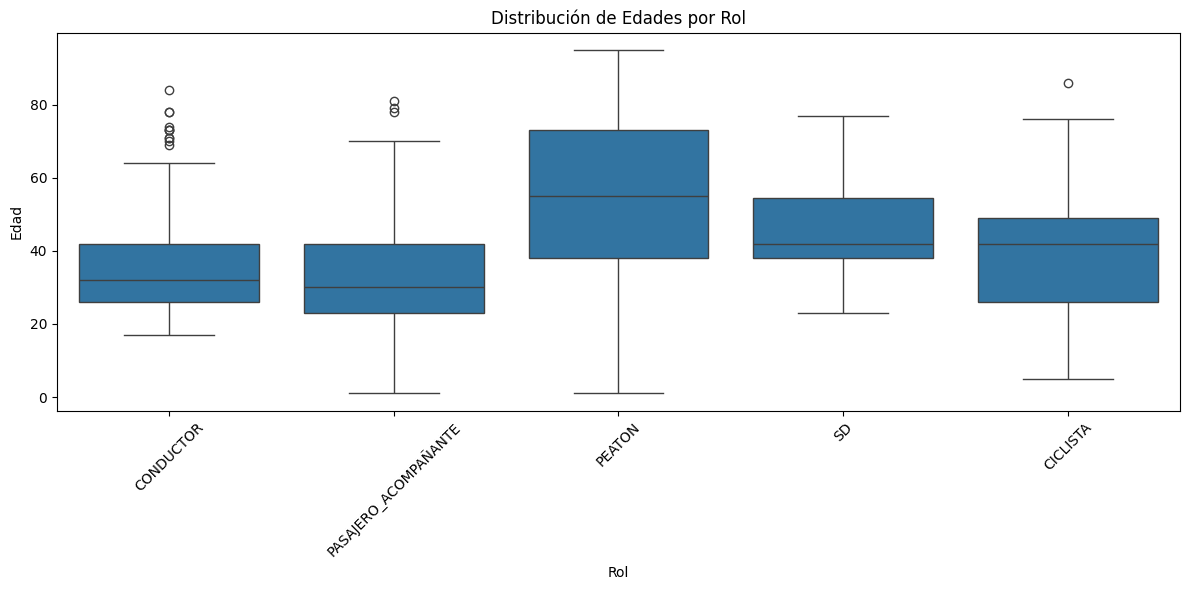

In [227]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Rol", y="Edad", data=df_victimas)
plt.xlabel("Rol")
plt.ylabel("Edad")
plt.title("Distribución de Edades por Rol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación del Gráfico: Distribución de Edades por Rol

### Conclusiones

Se puede observar como 2 de los 5 roles tienen edades bastante similares. Lo que resalta al grupo de 20 a 40 años como el mas vulnerable. Por otro lado, se puede observar como en el rol de peaton las personas de edad mas avanzada son las principales victimas.
De igual manera podemos ver valores atipicos en roles como "Conductor" y "Pasajero Acompañante". Lo que nos indica que sus victimas tienen una diversidad de edad. 

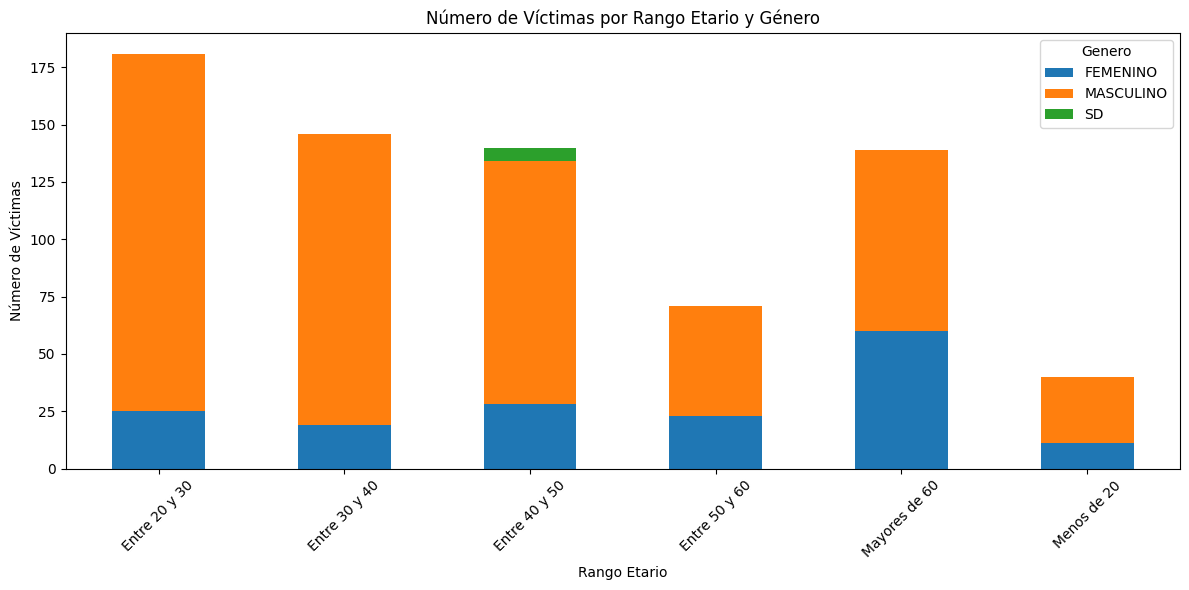

In [228]:
# Agrupamos los datos
group_edad_genero = df_victimas.groupby(["Rango_Etario", "Genero"]).size().unstack()

# Gráfico
group_edad_genero.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Rango Etario")
plt.ylabel("Número de Víctimas")
plt.title("Número de Víctimas por Rango Etario y Género")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación del Gráfico: Número de Víctimas por Rango Etario y Género
El gráfico muestra la distribución de víctimas por rango de edad y género. Cada barra representa un rango etario y está dividida en tres secciones, correspondientes al número de víctimas femeninas, masculinas y aquellas cuyo género no está definido (SD).

### Conclusiones Clave:
- Dominancia Masculina: En general, se observa una mayor cantidad de víctimas masculinas en todos los rangos etarios. Esto sugiere una mayor exposición al riesgo para los hombres en los eventos analizados.
- Mayor Concentración en Adultos Jóvenes: Los rangos de edad entre 20 y 40 años presentan la mayor cantidad de víctimas, tanto hombres como mujeres. Esto indica que los adultos jóvenes son los más afectados.
- Disminución en Extremos: En los extremos de edad (menores de 20 años y mayores de 60 años) se observa una menor cantidad de víctimas, lo que podría estar relacionado con una menor exposición al riesgo o con factores protectores en estos grupos.
- Variabilidad por Rango Etario: La proporción entre hombres y mujeres varía ligeramente según el rango etario. En algunos casos, la diferencia es más marcada que en otros.

In [235]:
# Datos estadisticos sobre Edad
df_victimas["Edad"].describe()

count    717.000000
mean      42.154812
std       19.041627
min        1.000000
25%       28.000000
50%       39.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

<Figure size 1200x600 with 0 Axes>

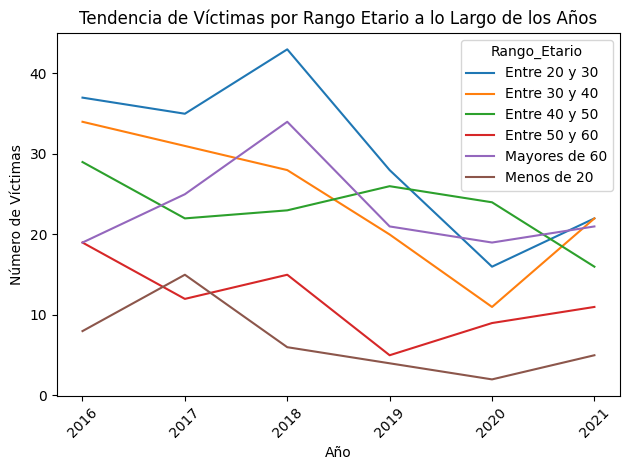

In [229]:
plt.figure(figsize=(12, 6))
df_victimas.groupby(['Año', 'Rango_Etario']).size().unstack().plot(kind='line')
plt.xlabel("Año")
plt.ylabel("Número de Víctimas")
plt.title("Tendencia de Víctimas por Rango Etario a lo Largo de los Años")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación del Gráfico: Tendencia de Víctimas por Rango Etario a lo Largo de los Años
El gráfico muestra cómo ha variado el número de víctimas en diferentes grupos de edad a lo largo de los años.

### Conclusiones Clave:
- Mayoría de Víctimas en Adultos Jóvenes: A lo largo de los años, el grupo de edad entre 20 y 30 años ha mantenido el mayor número de víctimas. Esto sugiere que este grupo etario se encuentra en una situación de mayor vulnerabilidad.
- Tendencia a la Baja: En general, se observa una tendencia a la baja en el número de víctimas en todos los grupos de edad. Esto podría indicar que se han implementado medidas efectivas para reducir el riesgo o que las condiciones que originaban las victimizaciones han mejorado.
- Variabilidad entre Grupos de Edad: La disminución en el número de víctimas no ha sido uniforme en todos los grupos de edad. Algunos grupos han experimentado reducciones más pronunciadas que otros.
- Fluctuaciones Anuales: Se observan algunas fluctuaciones anuales en el número de víctimas, lo que sugiere que pueden existir factores estacionales o eventos específicos que influyen en estas variaciones.
- Fluctuaciones rebeledes a la tendencia: Se puede observar que el cuarto rango etario (Entre 50 y 60) no ha presentado el promedio de tendencia a la baja que se ve en los otros grupos. Puede ser un aspecto a tener en cuenta ya que, asumiendo que en los años pasados se han llevado a cabo estrategias de control, estas no están siendo efectivas con este grupo poblacional.

Procedemos a crear una tabla de contingencia para ya que las variables son las mismas pero en roles distintos (Victima y acusado)

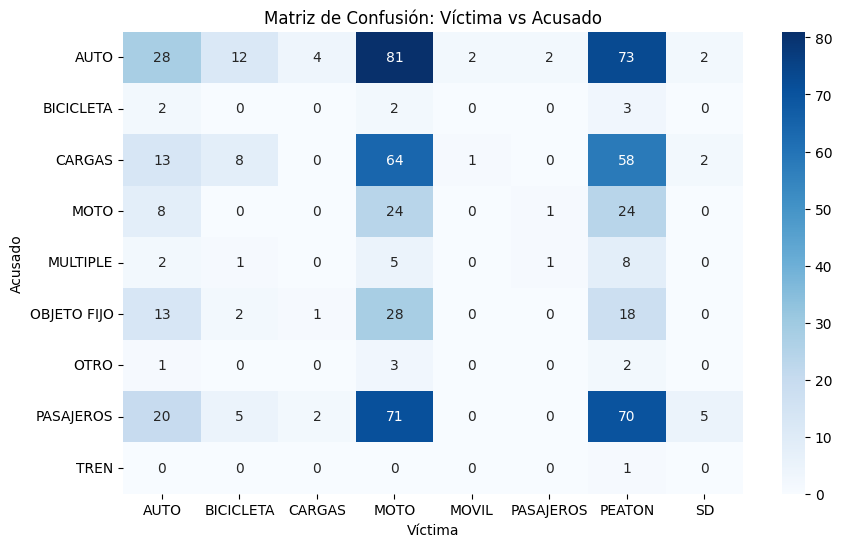

In [234]:
tabla_contingencia = pd.crosstab(df_hechos['Acusado'], df_victimas['Victima'])
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusión: Víctima vs Acusado')
plt.xlabel('Víctima')
plt.ylabel('Acusado')
plt.show()

### Interpretación de la Matriz de Confusión: Víctima vs. Acusado

Se puede concluir que los 3 acusados que mas victimas representan son "Auto", "Pasajeros" y "Carga". Y en cuanto a victimas el rol de "Moto" y "Pasajero" son los mas vulnerables. Puede afirmarse que esta directamente relacionado con la vulnerabilidad, ya que una moto y un peaton no poseen mecanismos de defensa que puedan amortiguar y disminuir el imapcto de un siniestro.

## CONSOLIDADO DE CONCLUSIONES OBTENIDAS

- La mayor cantidad de victimas en un accidente es 1 persona.
- Los años 2016 y 2018 fueron los años con mayor cantidad de siniestros.
- Los meses de Diciembre, Novimebre y Agosto fueron los meses con mayor cantidad de accidentes registrados.
- El lugar con mayor cantidad de siniestros observados fue AV 27 de Febrero y AV Escalada, representando el 18,2% de los accidentes en registro.
- El tipo de calle mas peligroso es la AVENIDA. Presentando una porcentaje de accidentes de 61,6%
- La calle con mayor cantidad de siniestros es PAZ, GRA AV, con un 32,6% de la totalidad de los incidentes.
- La comuna 1 es la comuna donde se registraron la mayor cantidad de accidentes, con un porcentaje de 15,9%
- En cuanto a los involucrados en accidentes PEATON (19%) y MOTOS (15,0%) fueron los elementos con mayor participación.
- PEATON (42,95%) y MOTO (38,4%) son las categorias de victimas mas vulnerables debido a su alto porcentaje.
- Los acusados con mayor participación como responsables de accidentes fueron AUTO (30%), PASAJEROS (25,7%) y CARGA (21,7%)
- Los hombres son el género mas vulnerable y con mayor cantidad de victimas.
- Las personas con edades entre 20 y 40 años fueron las mas vulnerables en siniestros de la ciudad de Buenos Aires.
- Por ultimo, en cuanto a rol de victimas las mas vulnerables fueron CONDUCTOR y PEATON.
